# ML Project:

---
- EDA
---

---
- Linearity
- Independent Errors
- Constant Variance across X Variable Ranges
- Normally Distributed Errors
- Low multicollinearity
---

---
- Models
---

In [331]:
# Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

In [332]:
# Datasets

houses_train = pd.read_csv("C:/Users/teste/Downloads/house-prices-advanced-regression-techniques/train.csv")

houses_test = pd.read_csv("C:/Users/teste/Downloads/house-prices-advanced-regression-techniques/test.csv")

---
### Basic EDA and Assumptions Check

In [255]:
houses_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [256]:
houses_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [257]:
houses_train.shape

(1460, 81)

In [258]:
houses_test.shape

(1459, 80)

In [268]:
numerical_columns = houses_train.select_dtypes(include=['number']).columns.tolist()
len(numerical_columns)

38

In [269]:
categorical_columns = houses_train.select_dtypes(include=['object', 'category']).columns.tolist()
len(categorical_columns)

43

In [270]:
houses_encoded = pd.get_dummies(houses_train, columns=categorical_columns, drop_first=True)


# can use drop_first attritube in get_dummies command to drop firt column of dummied vars
# helps multicollin

In [271]:
houses_encoded.shape

(1460, 247)

In [266]:
houses_encoded.head(3)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0     208500            0            0            1            0            1   
1     181500            0            0            1            0            1   
2     223500            0            0            1            0            1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             1                0   
2           0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   
2              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                    

In [264]:
houses_encoded = houses_encoded.drop(columns='Id')

In [272]:
houses_sale = houses_train['SalePrice']



houses_train['SalePrice'] = np.log(houses_train['SalePrice'])




houses_target = houses_train['SalePrice']
houses_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [273]:
houses_encoded = houses_encoded.drop(columns='SalePrice')

In [275]:
houses_encoded.fillna(0, inplace=True)

---
## Sales Price Transformation
- log transforming to make more normally distributed

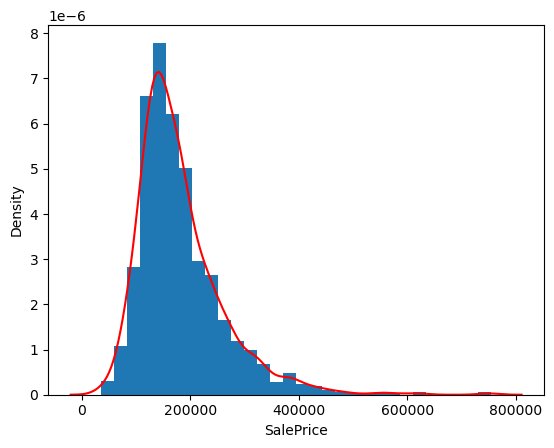

In [284]:
plt.hist(houses_sale, bins=30, density=True)
sns.kdeplot(houses_sale, color = 'r', label = 'Density Line')
plt.show()


## Not normally distributed, has some skew to it

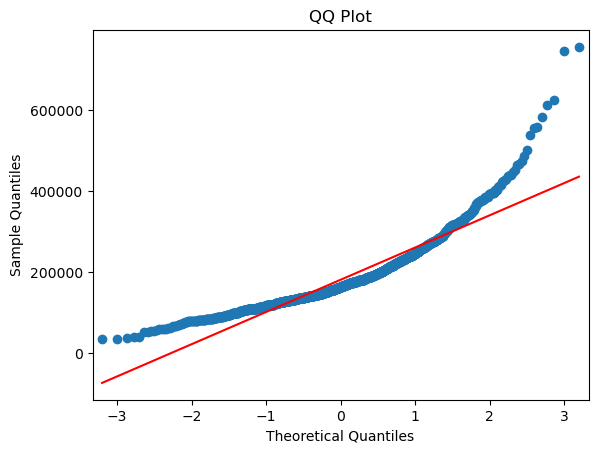

In [286]:
qqplot(houses_sale, line='s')
plt.title("QQ Plot")
plt.show()

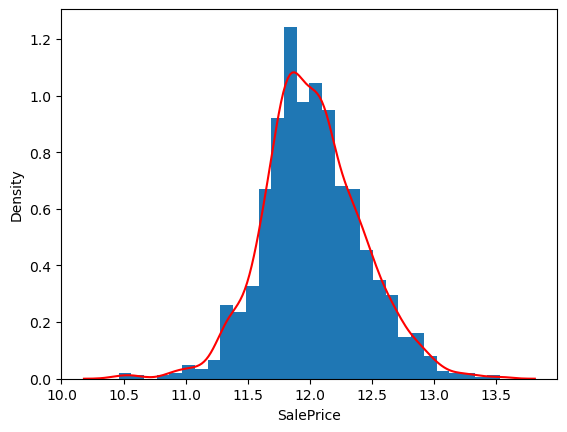

In [287]:
plt.hist(houses_target, bins=30, density=True)
sns.kdeplot(houses_target, color = 'r', label = 'Density Line')
plt.show()


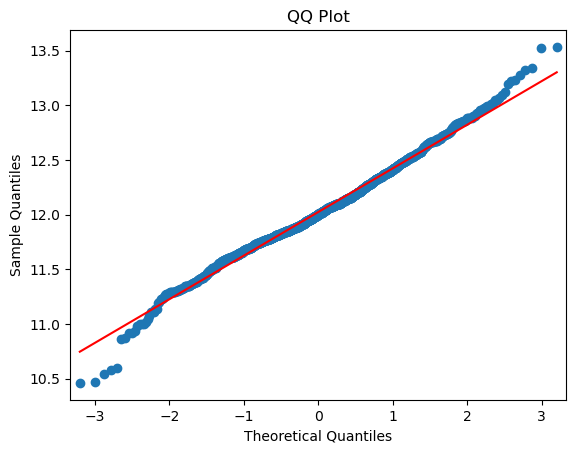

In [288]:
qqplot(houses_target, line='s')
plt.title("QQ Plot")
plt.show()

---
## Feature Engineering Testing

In [333]:
houses_encoded.head(2)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             1                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   

   Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_Po

In [334]:
houses_encoded_engi = houses_train.copy()

In [335]:
houses_encoded_engi

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [336]:
missing_values = houses_encoded_engi.isna().sum()
missing_values.sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [337]:
cols_with_missingness = ['PoolQC', 
                        'MiscFeature',
                        'Alley']

In [339]:
houses_encoded_engi = houses_encoded_engi.drop(cols_with_missingness, axis =1)

In [343]:
categorical_columns_engi = houses_encoded_engi.select_dtypes(include=['object', 'category']).columns.tolist()

In [344]:
houses_encoded_engi = pd.get_dummies(houses_encoded_engi, columns=categorical_columns_engi, drop_first=True)

In [345]:
cols_with_multicolin = ['TotRmsAbvGrd', 
                     'GarageCars', 
                     'MSZoning_RL', 
                     'Condition1_Feedr', 
                     'Condition2_Feedr', 
                     'RoofStyle_Gambrel', 
                    'Exterior2nd_CBlock',
                     'GarageQual_TA']

In [347]:
houses_encoded_engi = houses_encoded_engi.drop(cols_with_multicolin, axis =1)

In [680]:
houses_encoded_engi.head(2)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageYrBlt  \
0         2         1             3             1           0       2003.0   
1         2         0             3             1           1       1976.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RM  \
0         0        0       2    2008            0            0            0   
1         0        0       5    2007            0            0            0   

   Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            1             0             0             1                0   
1            1             0             0             1                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   

   Neighborhood_Veenker  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0                     0                1                0                0   
1                     1                0                0                0   

   Cond

In [354]:
houses_encoded_engi.fillna(0, inplace=True)

In [645]:
houses_encoded_engi_target = houses_encoded_engi['SalePrice']

In [681]:
houses_encoded_engi_target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1456, dtype: int64

In [706]:
houses_encoded_engi_target = np.log(houses_encoded_engi_target)

In [707]:
houses_encoded_engi_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1456, dtype: float64

In [679]:
houses_encoded_engi.drop(columns='SalePrice', axis=1, inplace=True)

## Outliers from QQplots
- Sale Price and GrLivArea?

Text(0, 0.5, 'SalePrice')

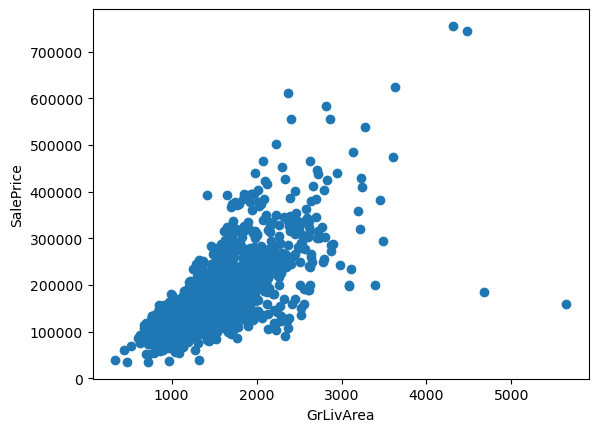

In [395]:
plt.scatter(x= houses_train["GrLivArea"], y=houses_train["SalePrice"])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [396]:
houses_encoded_engi = houses_encoded_engi[houses_encoded_engi['GrLivArea'] < 4000]

Text(0, 0.5, 'SalePrice')

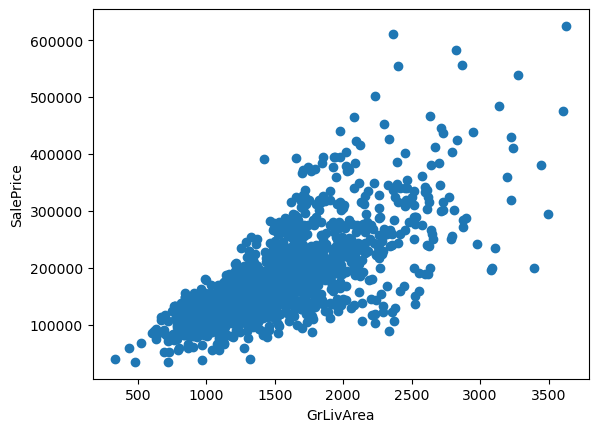

In [398]:
plt.scatter(x= houses_encoded_engi["GrLivArea"], y=houses_encoded_engi["SalePrice"])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

---
## 1. Checking Linearity Assumption


- Checking Linear Relationship bwtn x/y variables

- Using Scatterplots to see if any linear relationship between the dependent var (sale price) and the independent vars (every other column)

- Many vars have some kind of linear relation with sales price (most positive, e.g. more SF higher Sale Price)

- Multicollinearity seems very possible with different columns that are very similar such as different SF measurements for the same area, or one area having high SF most likely means other areas with have higher SF as well

### 1.1 Scatterplot of Variables

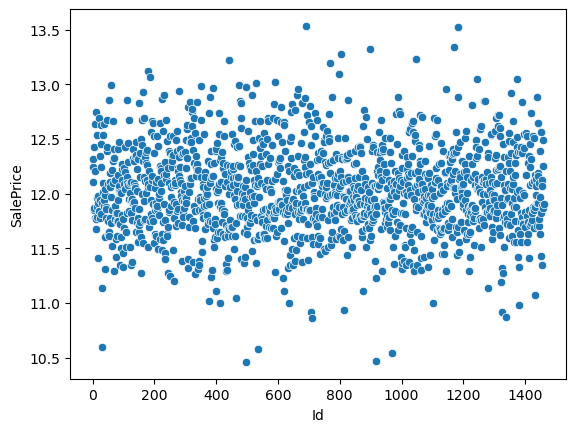

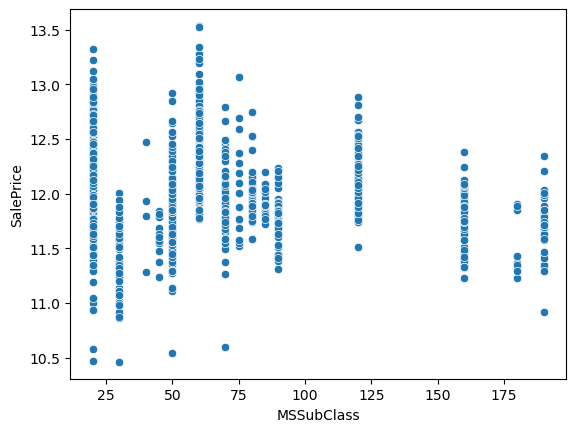

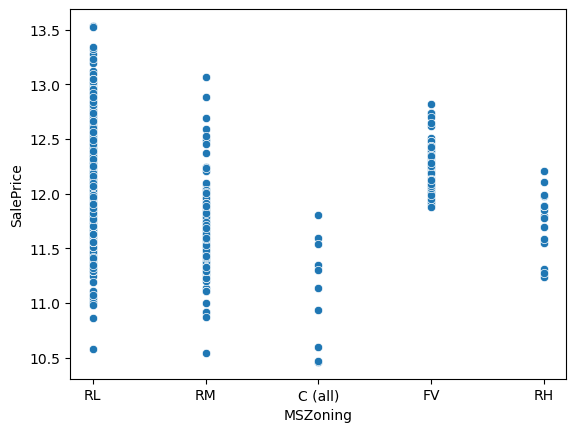

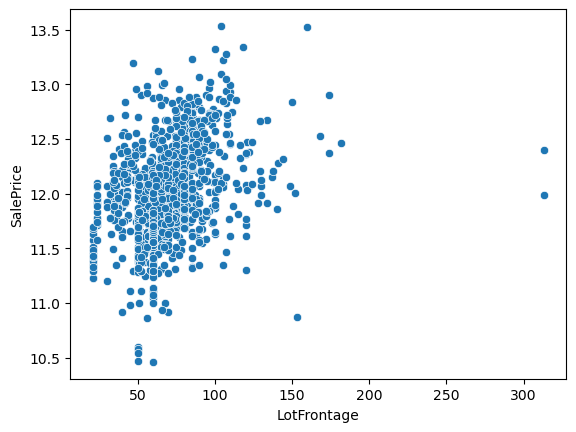

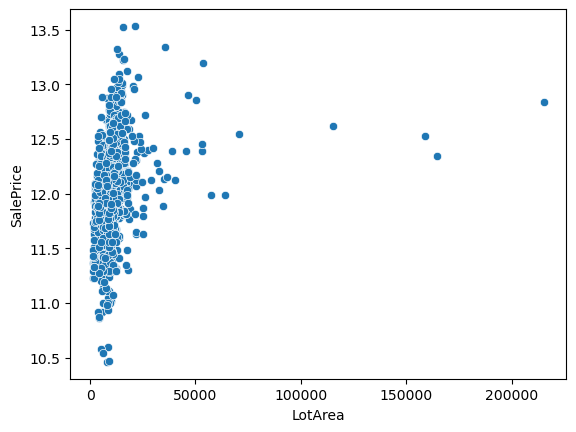

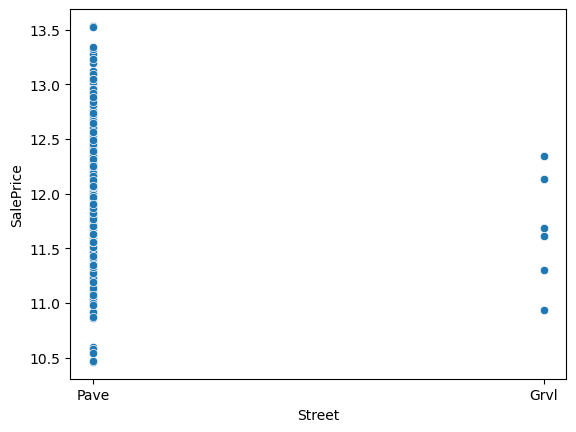

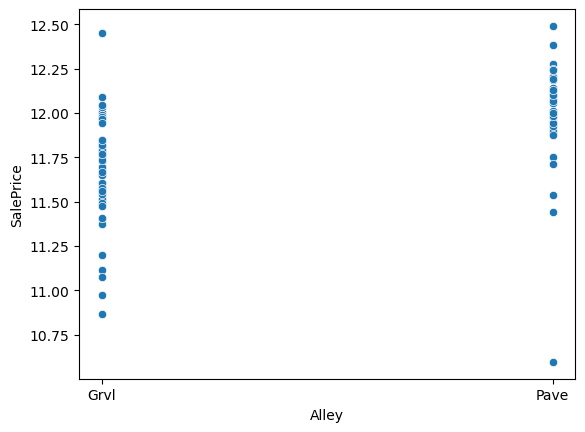

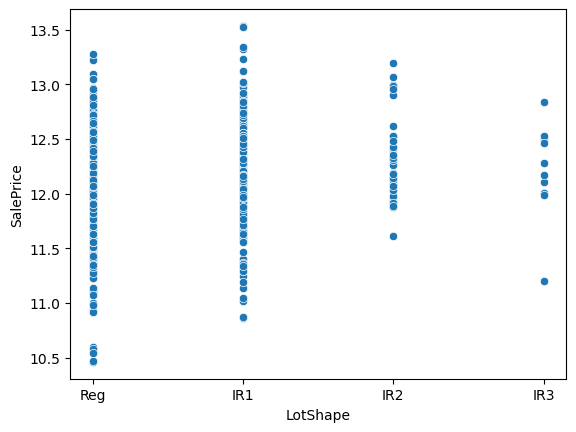

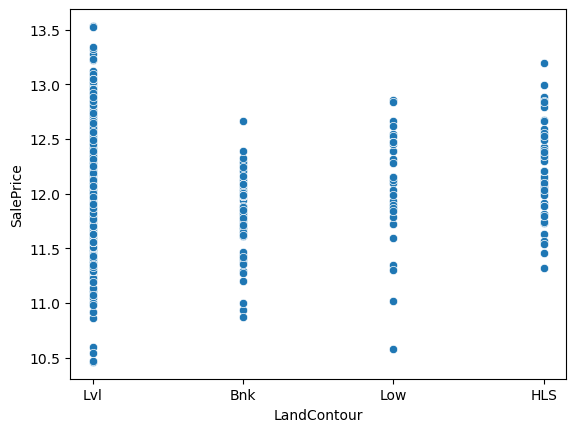

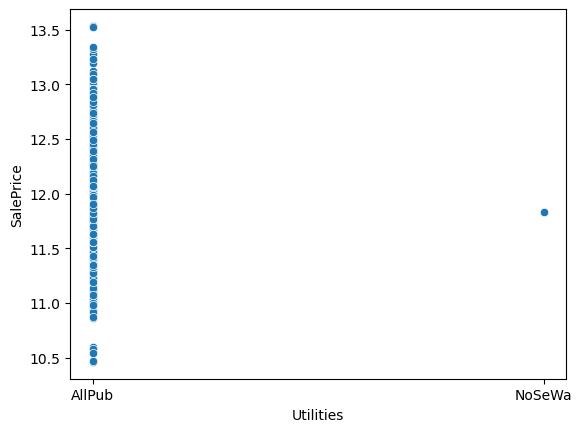

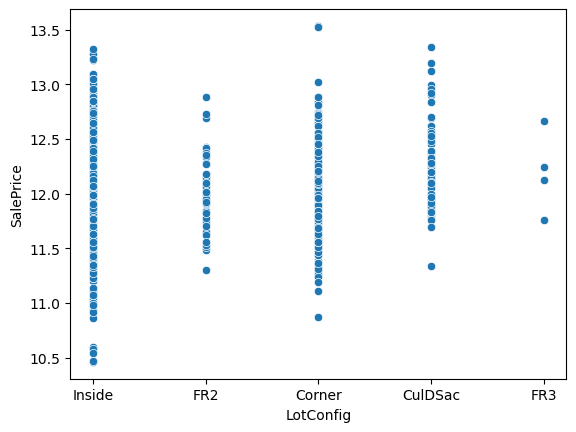

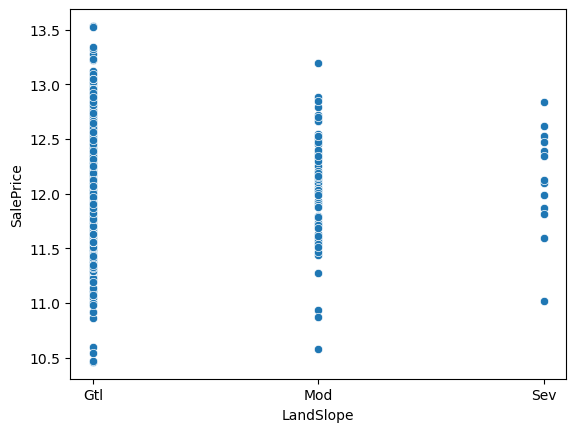

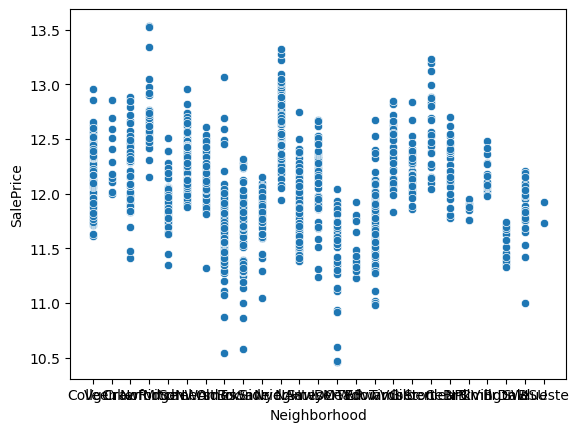

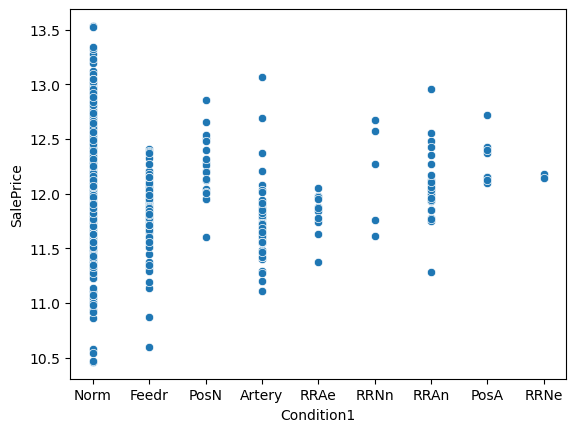

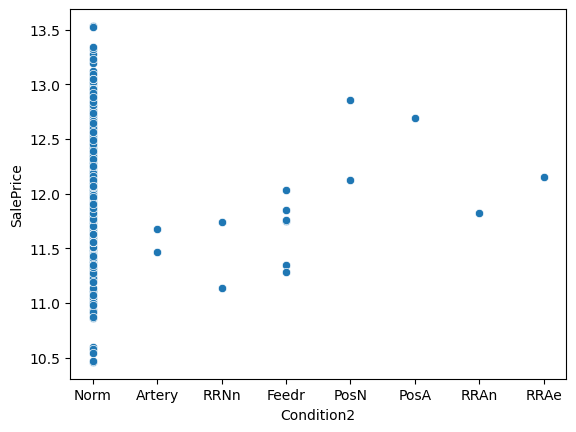

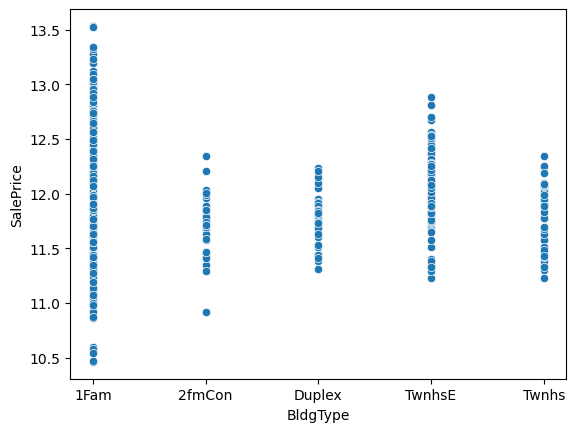

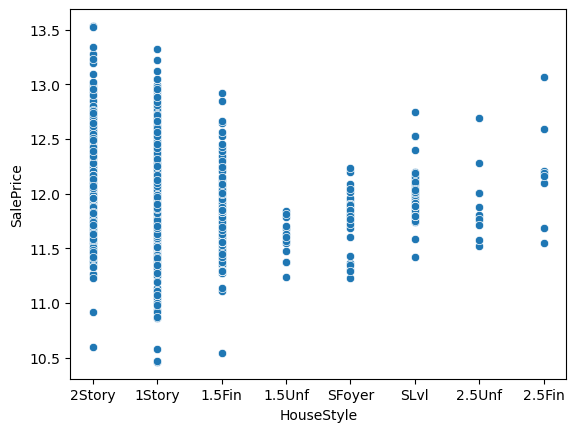

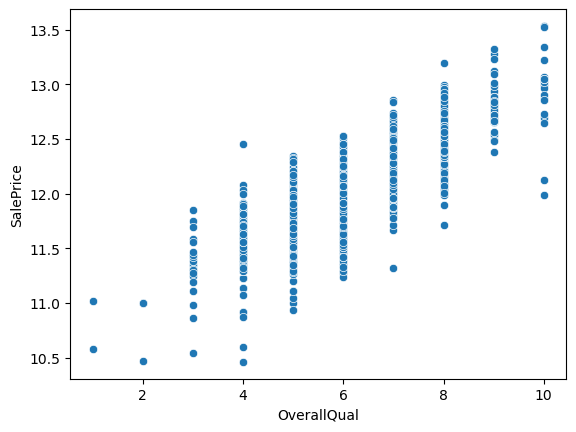

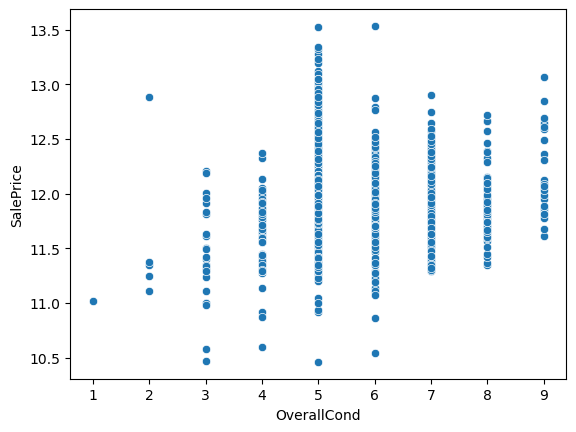

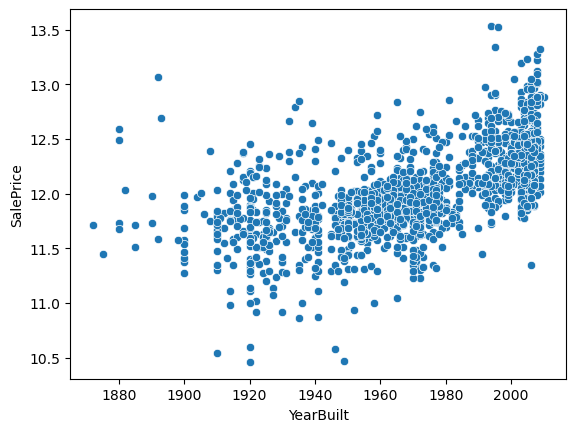

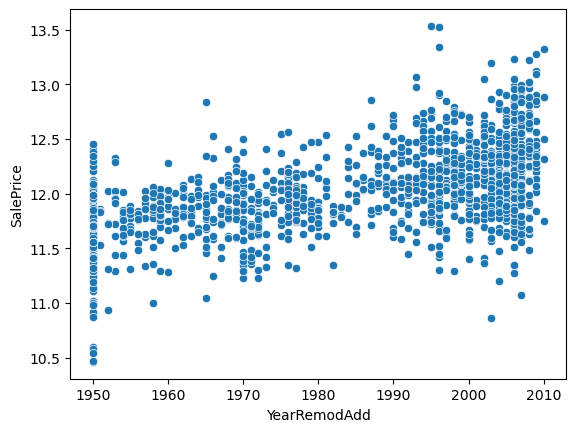

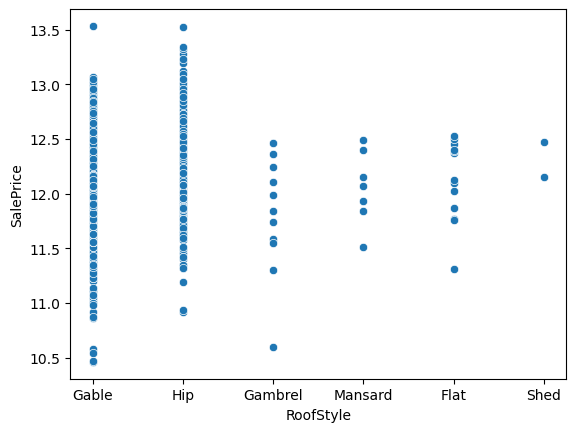

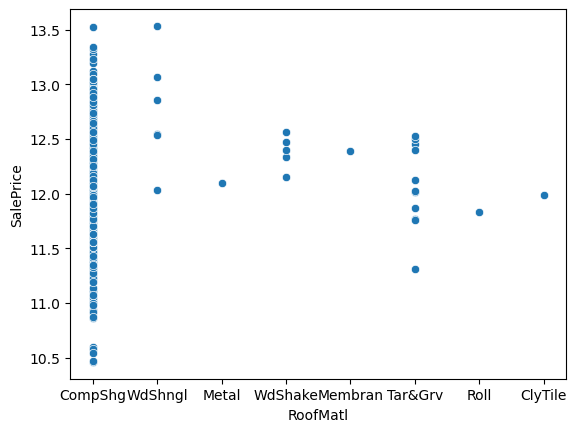

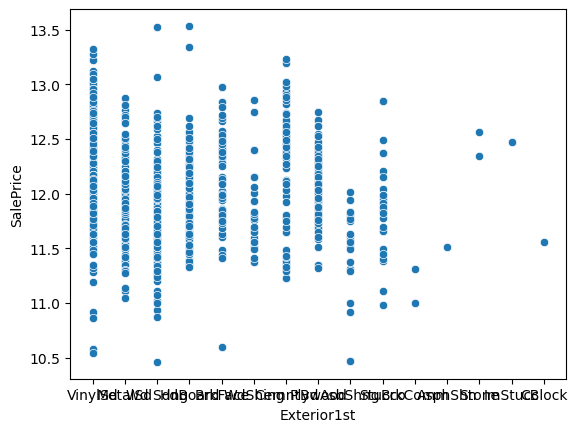

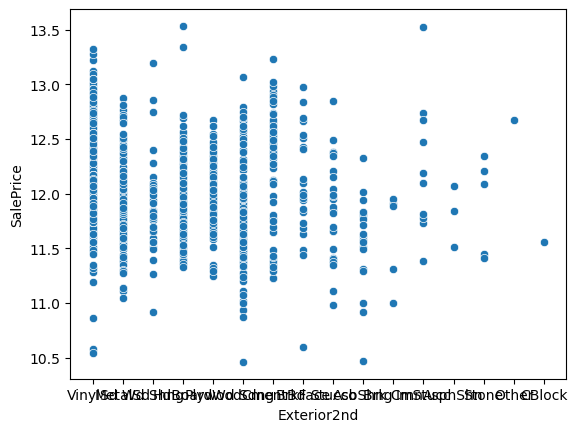

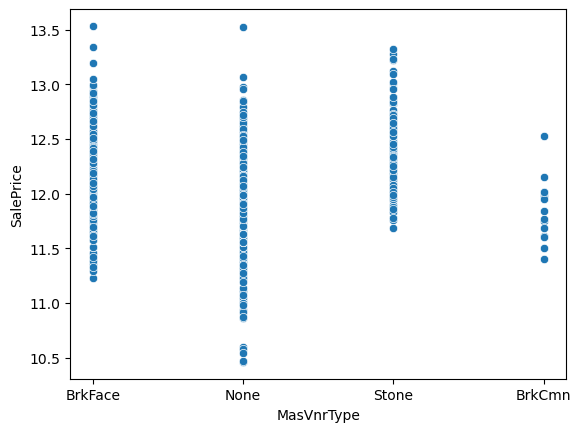

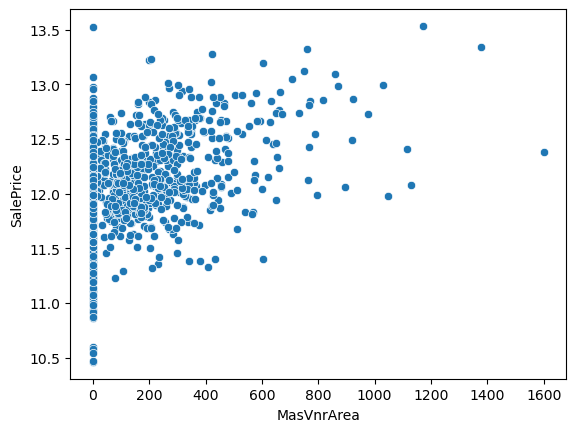

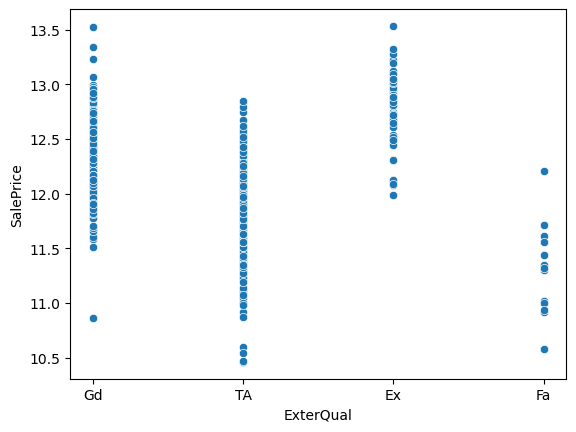

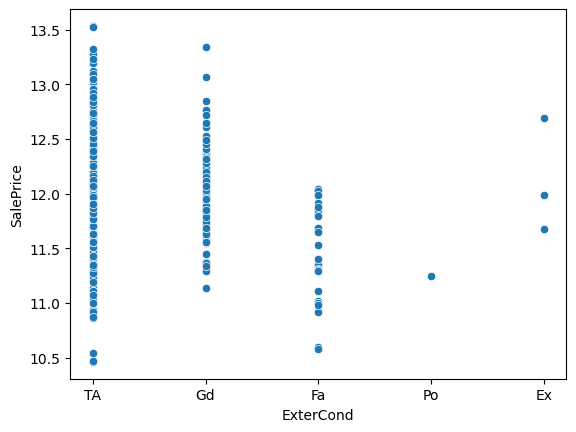

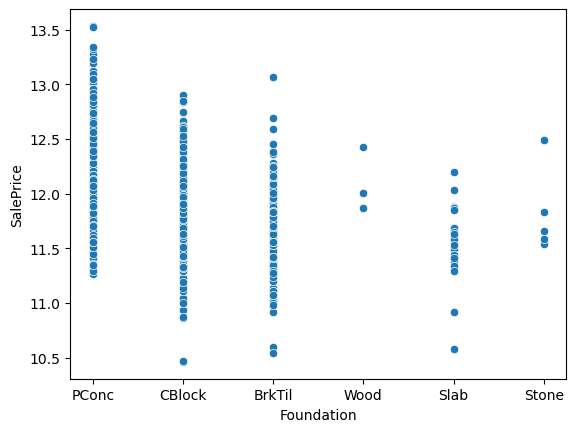

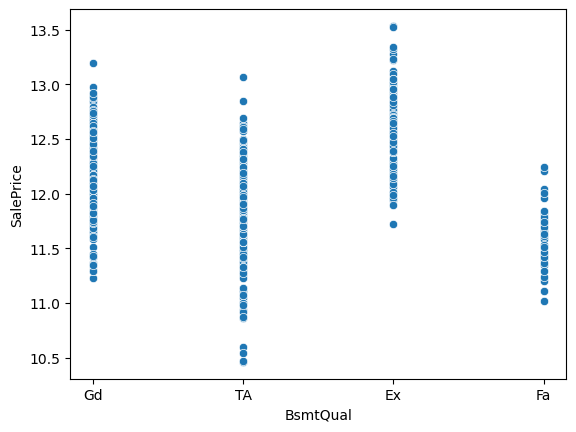

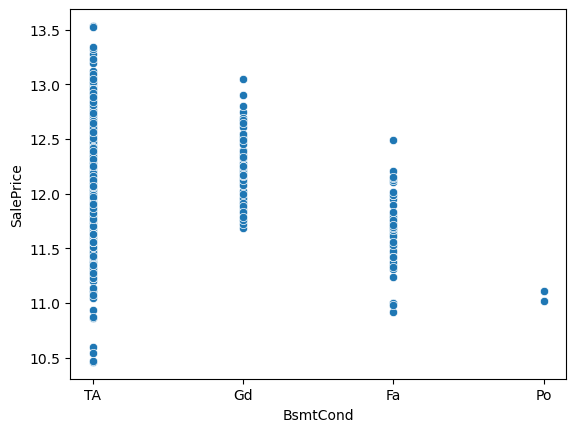

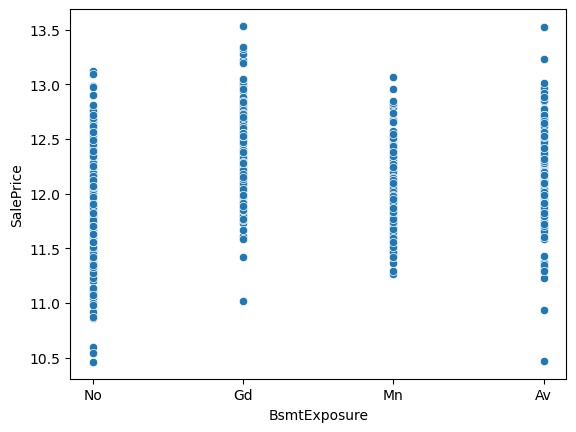

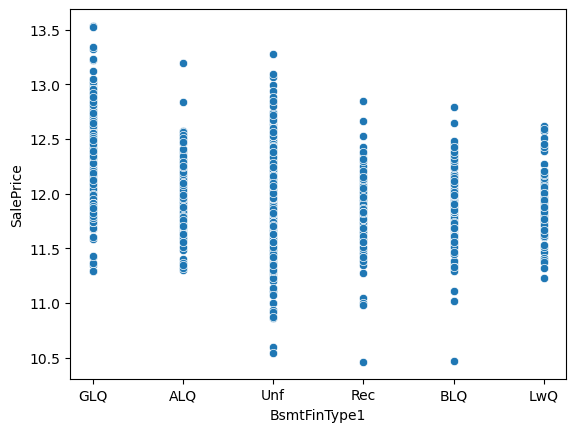

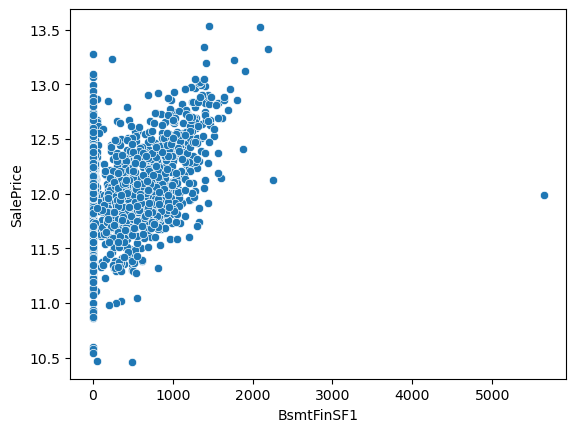

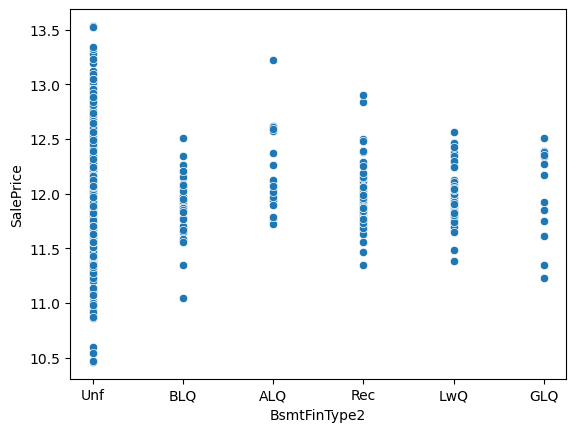

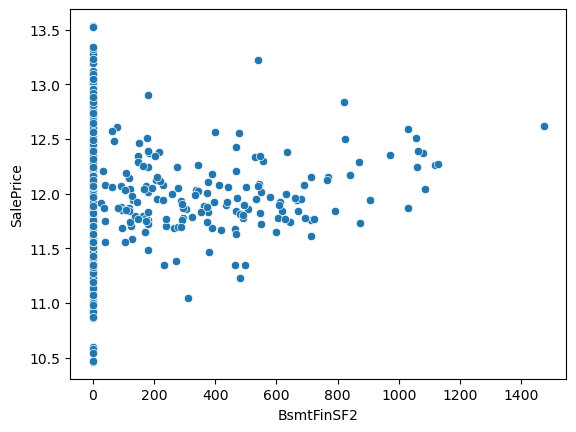

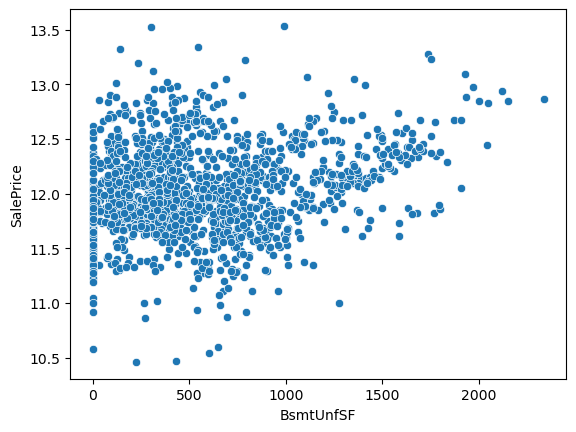

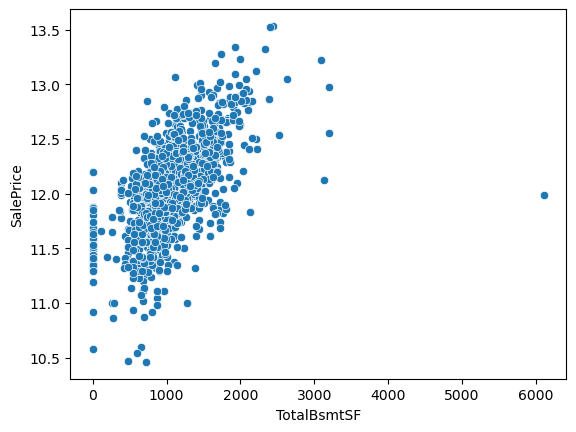

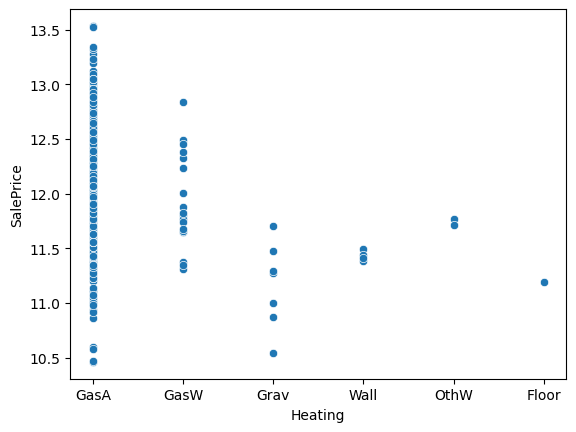

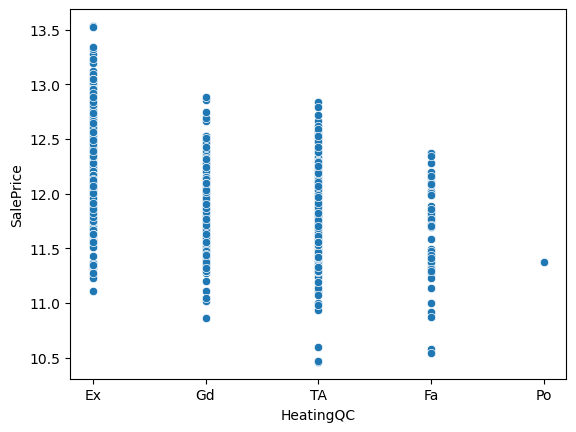

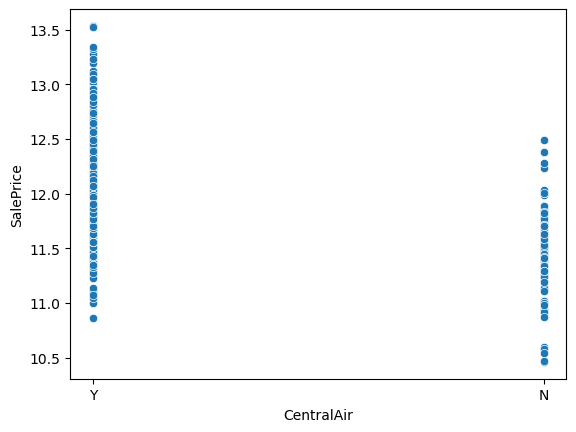

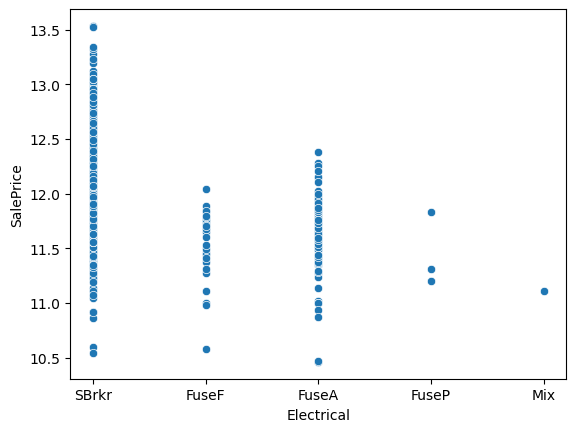

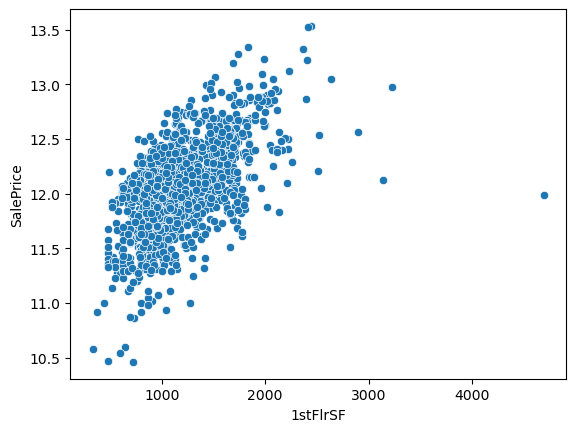

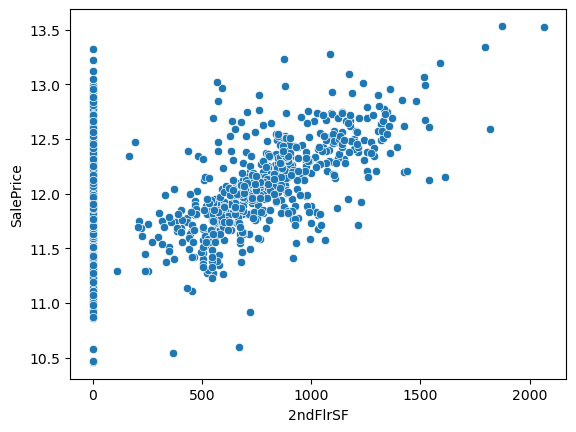

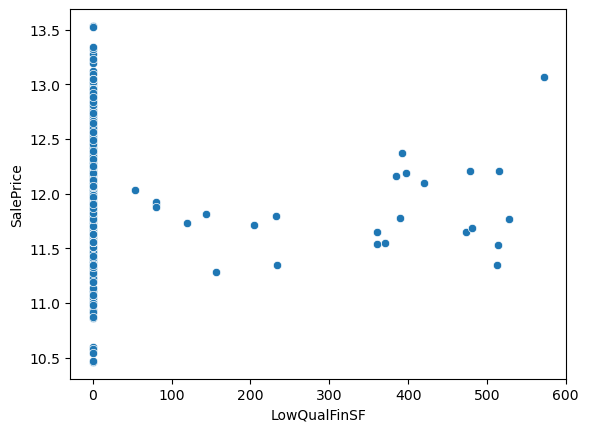

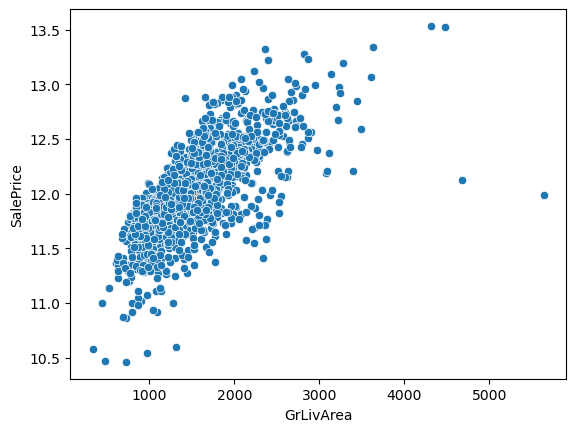

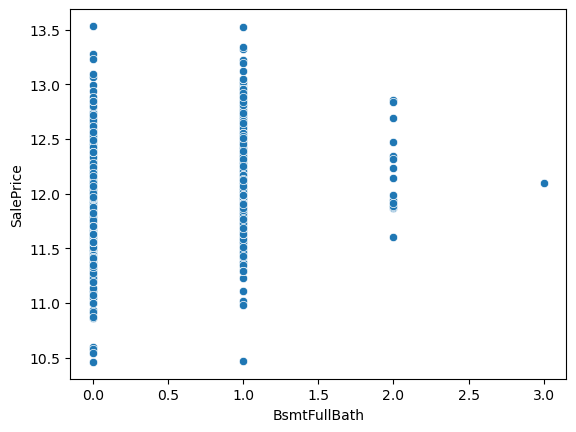

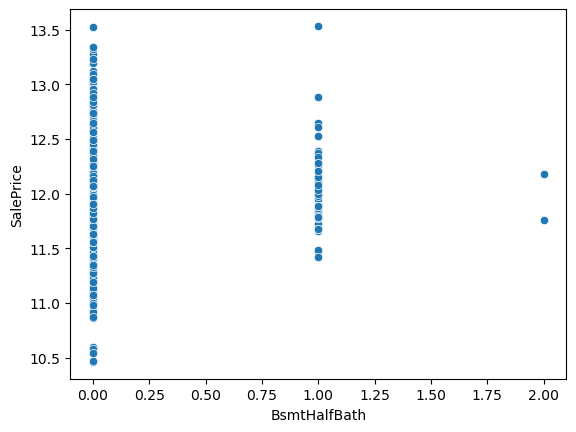

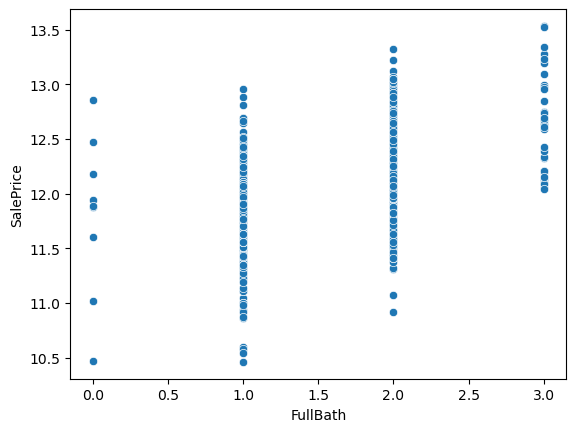

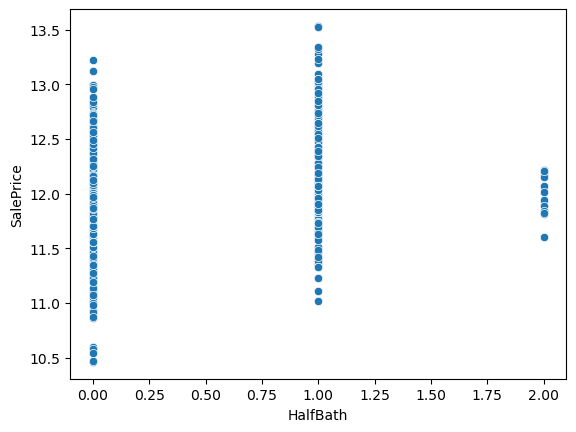

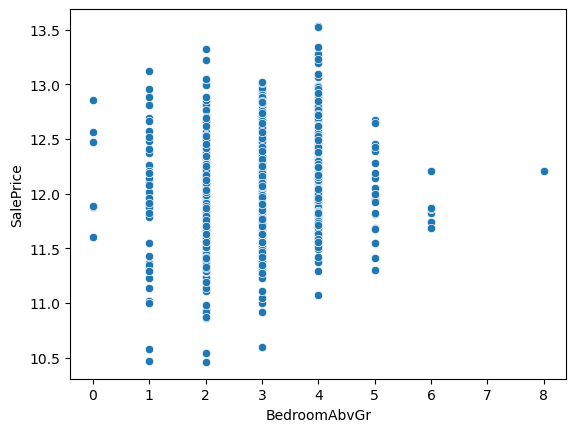

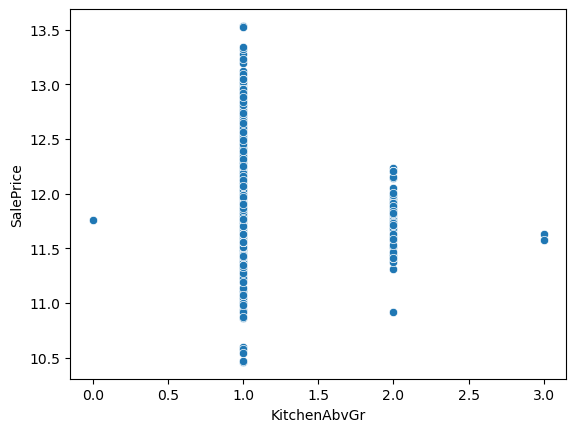

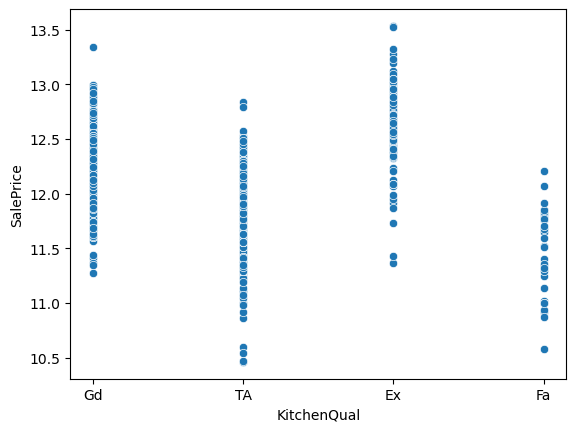

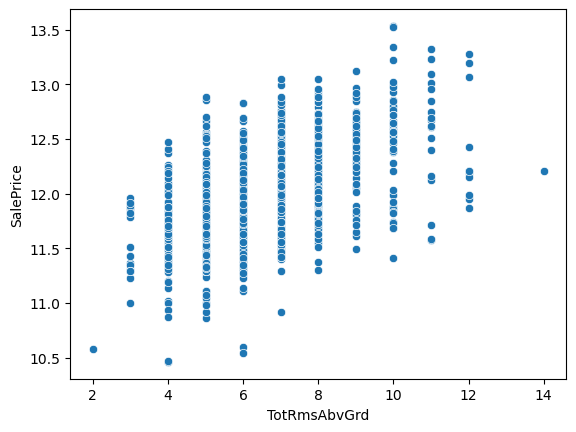

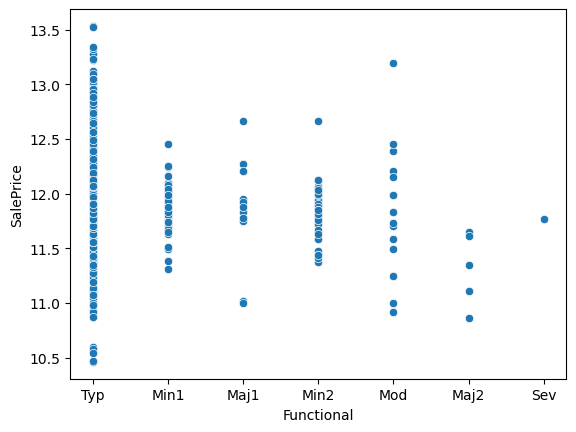

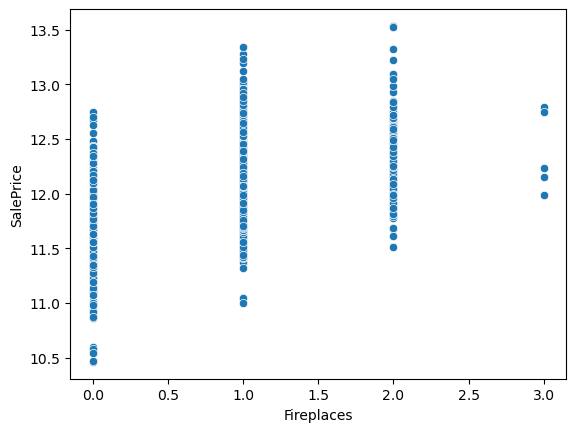

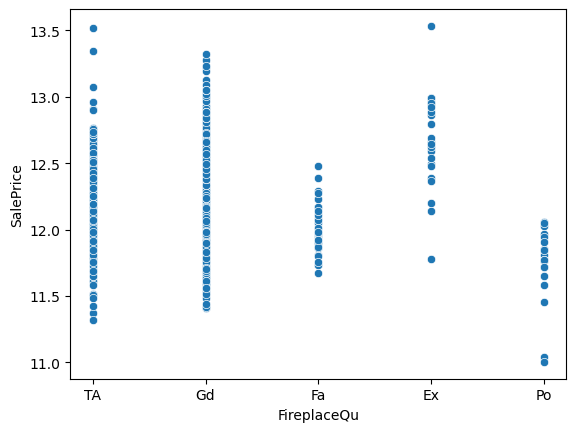

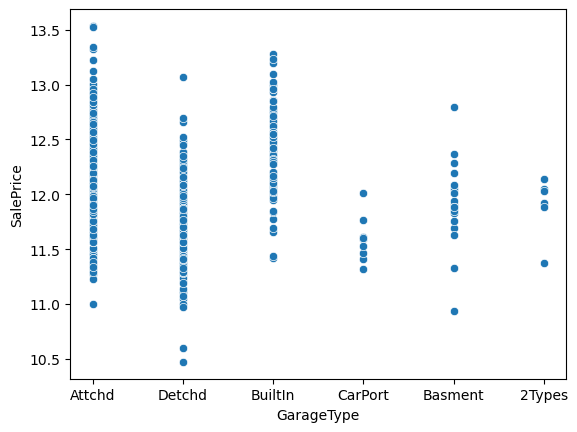

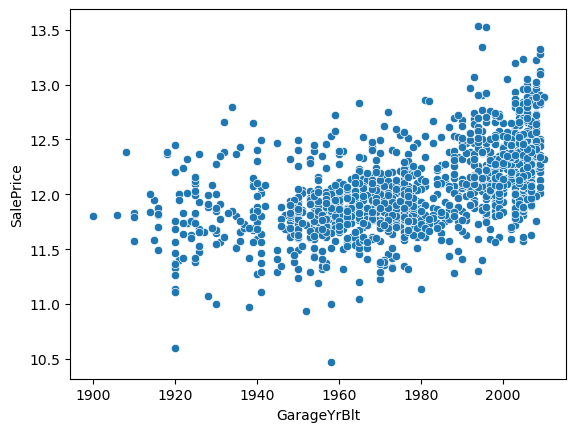

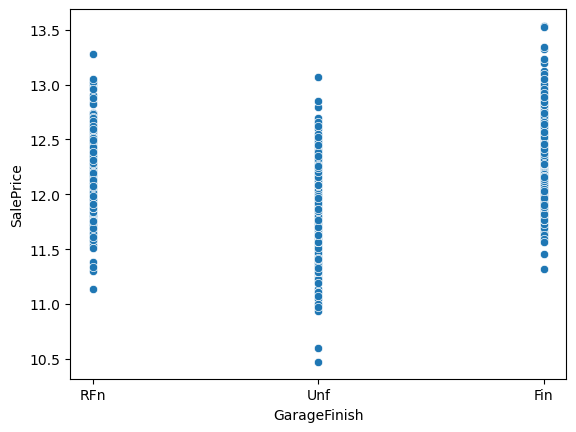

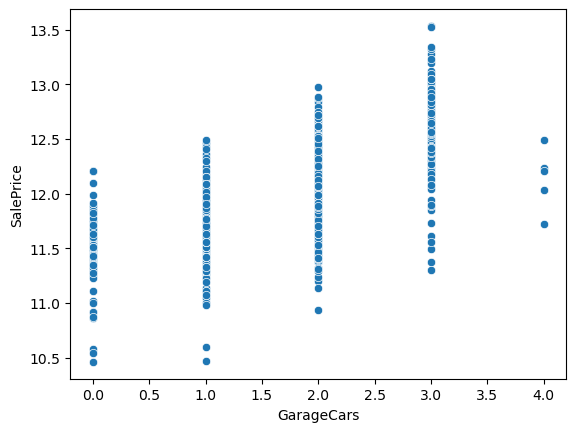

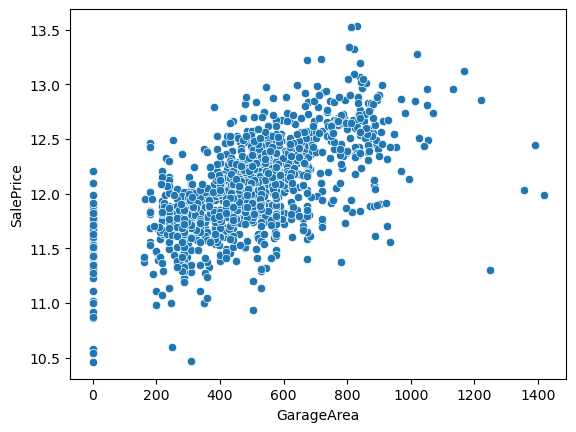

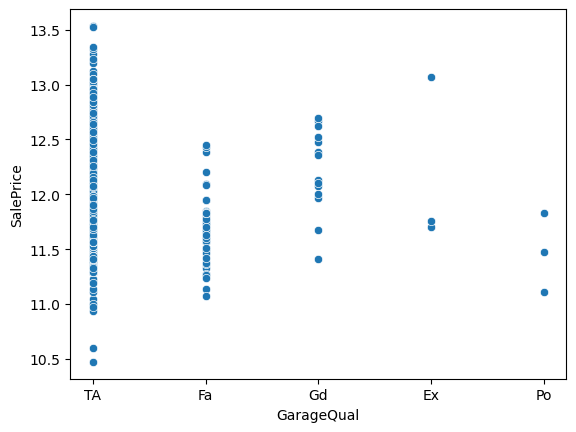

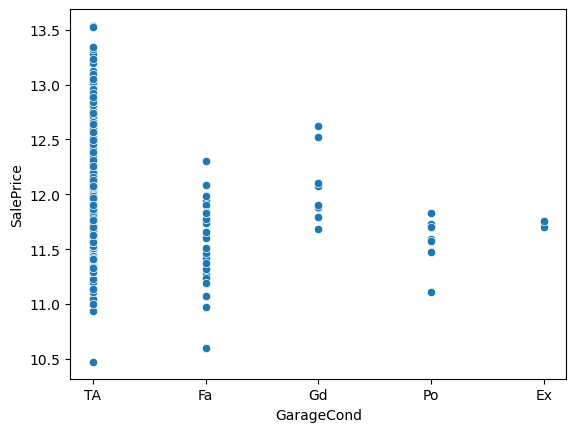

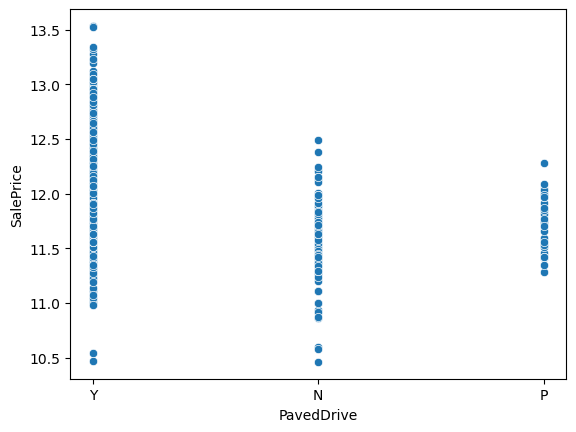

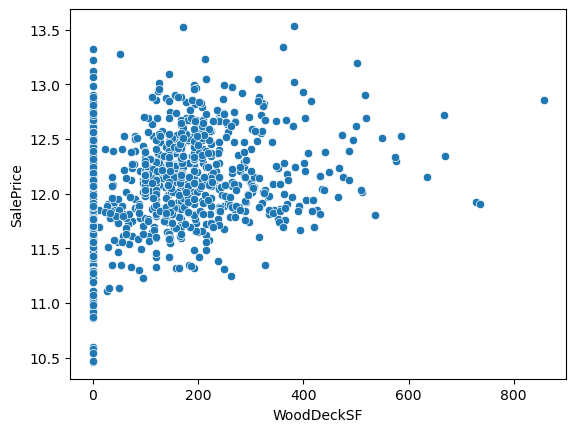

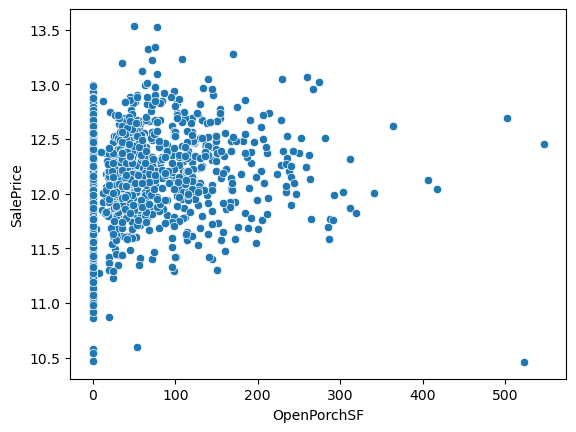

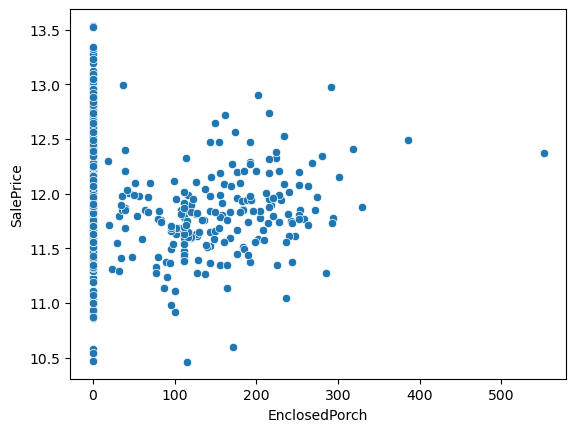

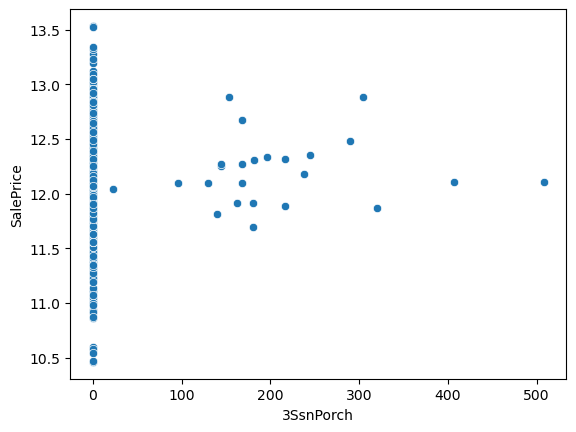

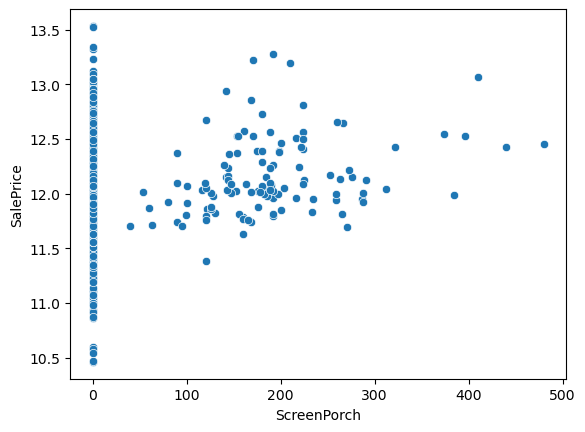

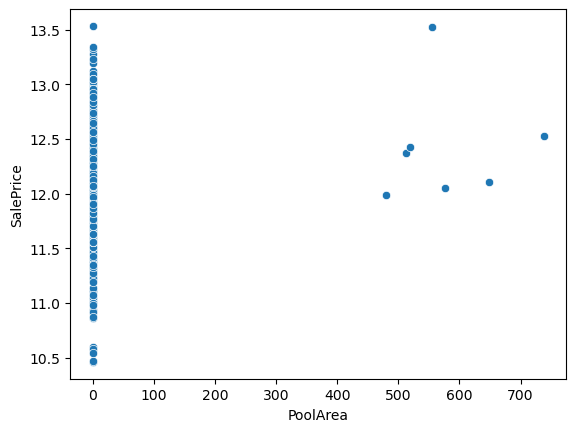

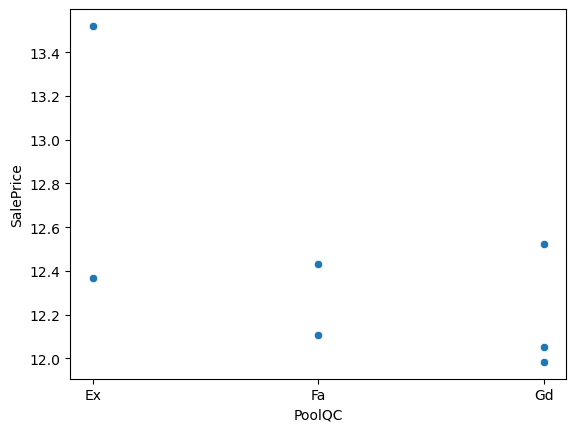

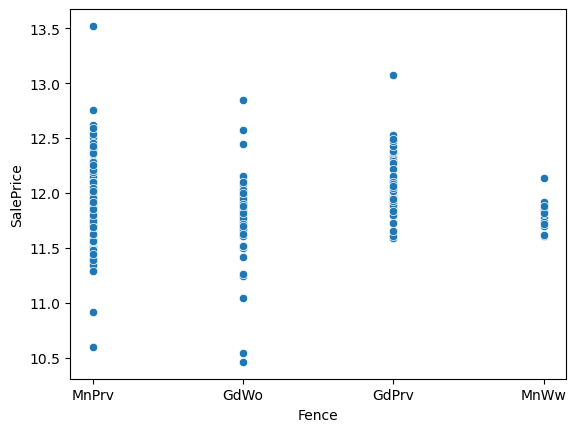

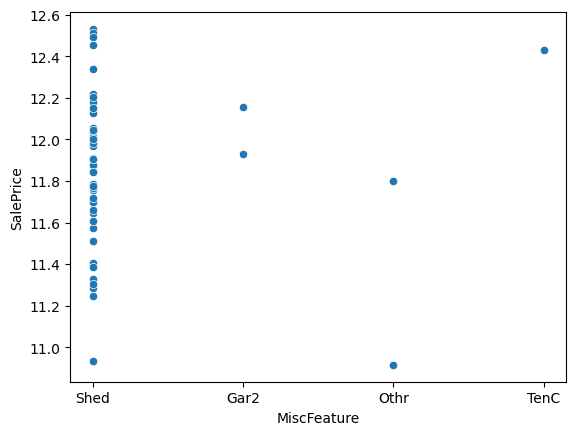

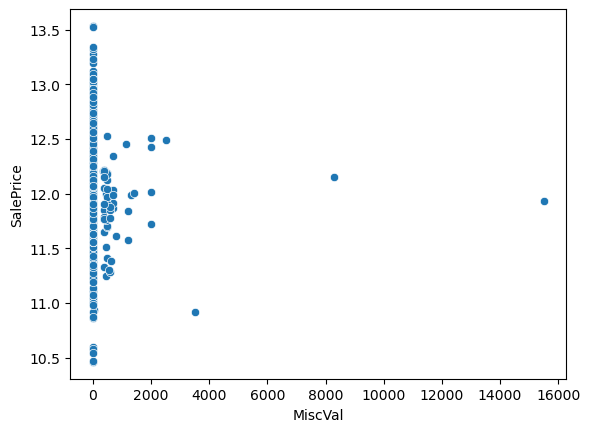

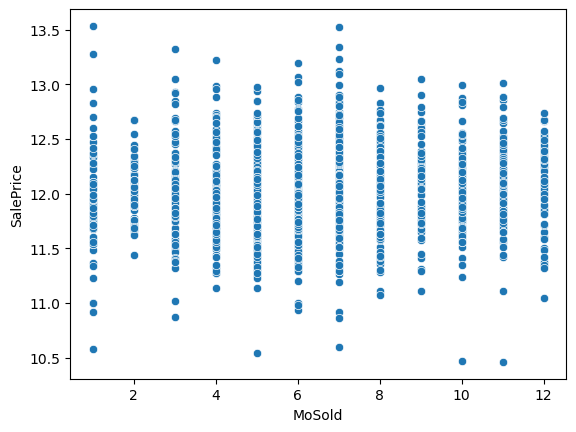

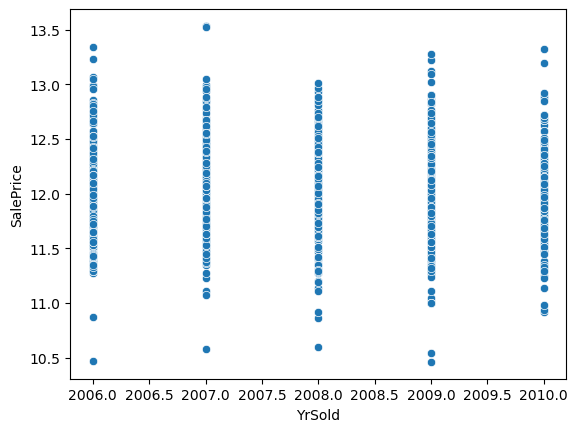

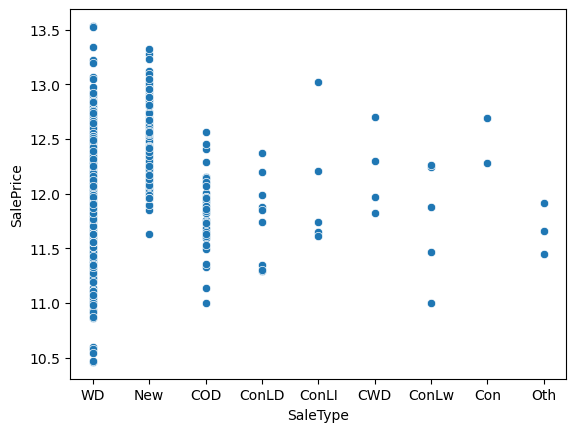

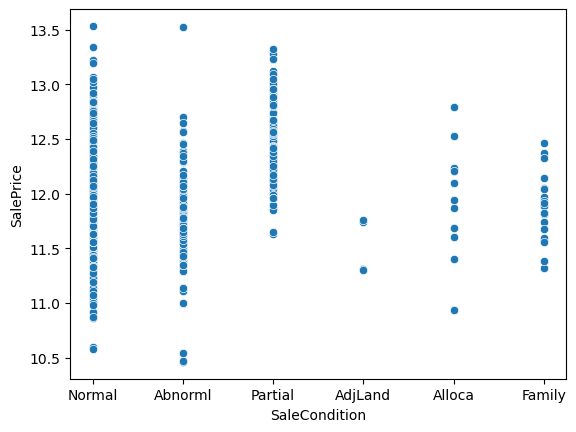

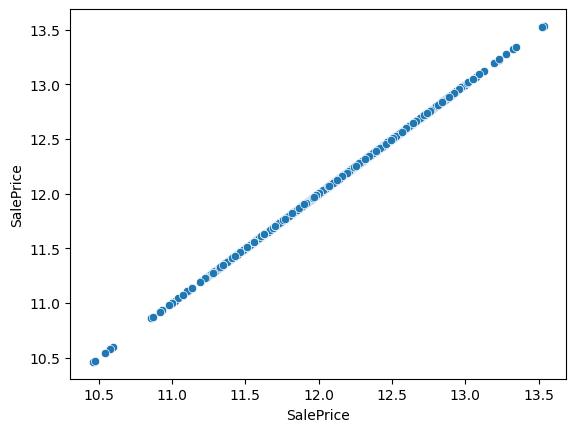

In [20]:
# For Loop for Multiple Scatter Plots for Each Column in Training Data

ind_vars = houses_train.columns  # Independent Variables

#dp_var = houses_target          # Dependent Variable

for var in ind_vars:
    sns.scatterplot(data = houses_train, x=var, y= houses_target)
    plt.show()

---
## 2. Independent Errors Assumption
- Need to ensure no relationship betweens the errors 
- Using a Scatterplot of 'Residuals versus Fits' (corr should be ~0)

In [102]:
# Predicted Values of Model

y_predicted = model_lasso.predict(houses_encoded)

C:\Users\teste\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Alley_Grvl
- BldgType_1Fam
- BsmtCond_Fa
- BsmtExposure_Av
- BsmtFinType1_ALQ
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 288 features, but Lasso is expecting 245 features as input.

In [285]:
# Residual Errors

residuals = houses_target - y_predicted

### 2.1 Residuals vs Fitted

In [82]:
# Residuals vs Fits Scatterplot

plt.scatter(y_predicted, residuals, alpha= 0.4)
plt.axhline(y=0, color='black', linewidth=1.5)
plt.show()

# Two potential outliers in scatter -> do I need to remove? how would I identify and remove them??

# Rest of plot looks good, errors look like they have no relationship

NameError: name 'y_predicted' is not defined

## look at indices -> look at features for this -> is it normal?

- remove if not representative

---
## 3. Constant Variance of Errors Assumption

- Same plot as Independent Errors
- Looking for constant variance btwn residuals using same plot as Independent Errors Assumption

### 3.1 Residuals vs Fitted

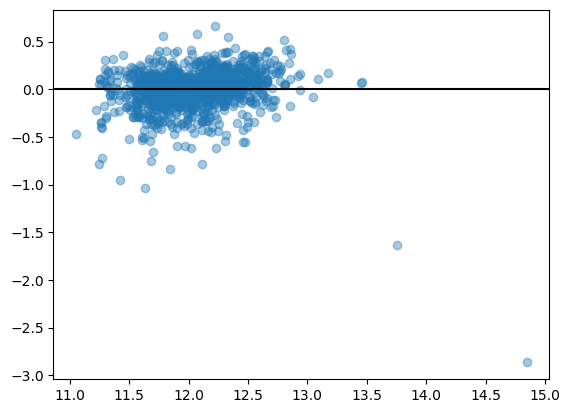

In [288]:
# Residuals vs Fits Scatterplot

plt.scatter(y_predicted, residuals, alpha= 0.4)
plt.axhline(y=0, color='black', linewidth=1.5)
plt.show()

# Two potential outliers in scatter -> do I need to remove? how would I identify and remove them??

# Rest of plot looks good, errors look like they have constant variance

---
## 4. Normally Distributed Errors Assumption

- Need to check to ensure errors/residuals are normall distributed
- Will use a normal histogram/density plot and a QQ plot to check

### 4.1 Residuals Density Plot

- Looks relatively normal

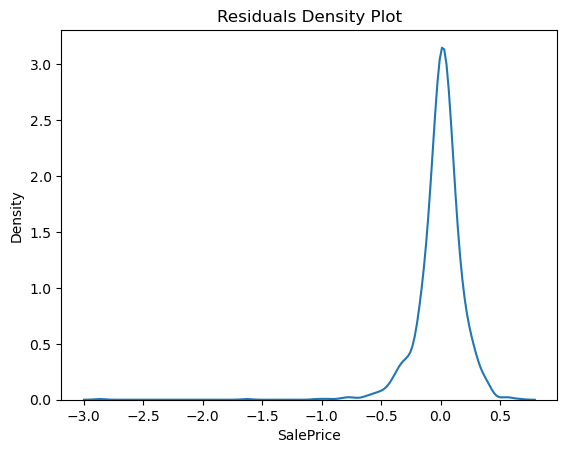

In [289]:
sns.kdeplot(residuals)
plt.title('Residuals Density Plot')
plt.show()

### 4.2 Residuals Histogram

- Looks relatively normal

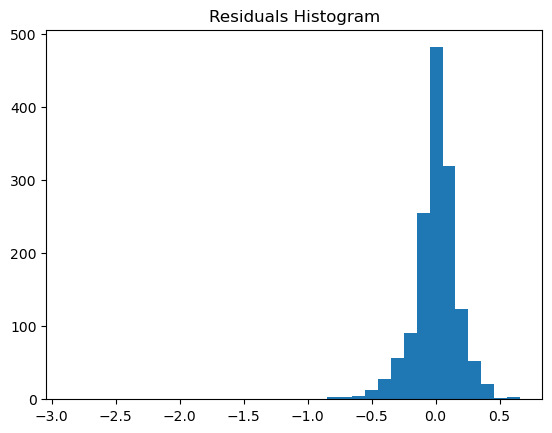

In [290]:
plt.hist(residuals, bins=35)
plt.title('Residuals Histogram')
plt.show()

### 4.3 QQ Plot

- Looks good

In [285]:
from statsmodels.graphics.gofplots import qqplot

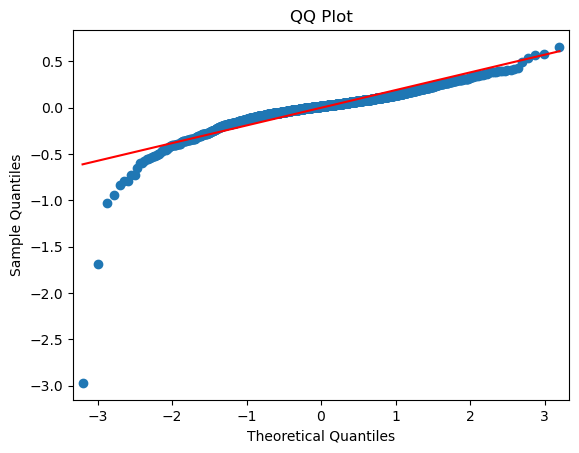

In [50]:
qqplot(residuals, line='s')
plt.title("QQ Plot")
plt.show()

---
## 5. Multicollinearity

- Definitely going to be an issue in this dataset with similar independent/X variables
- Lasso Penalization should penalize all coefficients that are correlated with each other
- Can check VIF and correlation matrix

### 5.1 Correlation Matrix Heatmap

- Looking at correlation between variables (not just between target)
- Correlation should be low
- Lasso should penalize all high corr variables (selects one and the rest go towards 0 coef, controlled by alpha param)

In [91]:
houses_encoded.shape

(1460, 288)

In [22]:
# Subsetting by 15 columns for encoded DF

houses_set_1 = houses_encoded.iloc[:, :15]
houses_set_2 = houses_encoded.iloc[:, 15:30]
houses_set_3 = houses_encoded.iloc[:, 30:45]
houses_set_4 = houses_encoded.iloc[:, 60:75]
houses_set_5 = houses_encoded.iloc[:, 75:90]
houses_set_6 = houses_encoded.iloc[:, 90:105]
houses_set_7 = houses_encoded.iloc[:, 105:120]
houses_set_8 = houses_encoded.iloc[:, 120:135]
houses_set_9 = houses_encoded.iloc[:, 135:150]
houses_set_10 = houses_encoded.iloc[:, 150:165]
houses_set_11 = houses_encoded.iloc[:, 165:180]
houses_set_12 = houses_encoded.iloc[:, 180:195]
houses_set_13 = houses_encoded.iloc[:, 195:210]
houses_set_14 = houses_encoded.iloc[:, 210:225]
houses_set_15 = houses_encoded.iloc[:, 225:240]
houses_set_16 = houses_encoded.iloc[:, 240:255]

In [24]:
# Corr Matrices

corr_mtrx_1 = houses_set_1.corr()
corr_mtrx_2 = houses_set_2.corr()
corr_mtrx_3 = houses_set_3.corr()
corr_mtrx_4 = houses_set_4.corr()
corr_mtrx_5 = houses_set_5.corr()
corr_mtrx_6 = houses_set_6.corr()
corr_mtrx_7 = houses_set_7.corr()
corr_mtrx_8 = houses_set_8.corr()
corr_mtrx_9 = houses_set_9.corr()
corr_mtrx_10 = houses_set_10.corr()
corr_mtrx_11 = houses_set_11.corr()
corr_mtrx_12 = houses_set_12.corr()
corr_mtrx_13 = houses_set_13.corr()
corr_mtrx_14 = houses_set_14.corr()
corr_mtrx_15 = houses_set_15.corr()
corr_mtrx_16 = houses_set_16.corr()

In [25]:
cmap = 'coolwarm'

### Matrix 1

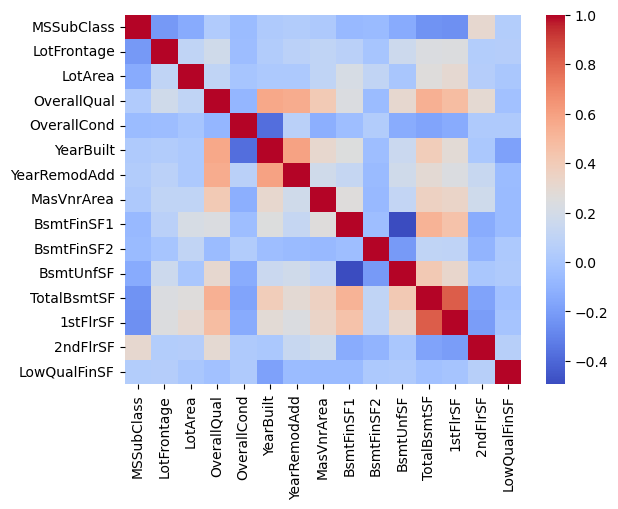

<Figure size 2000x1600 with 0 Axes>

In [395]:
sns.heatmap(corr_mtrx_1, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 2

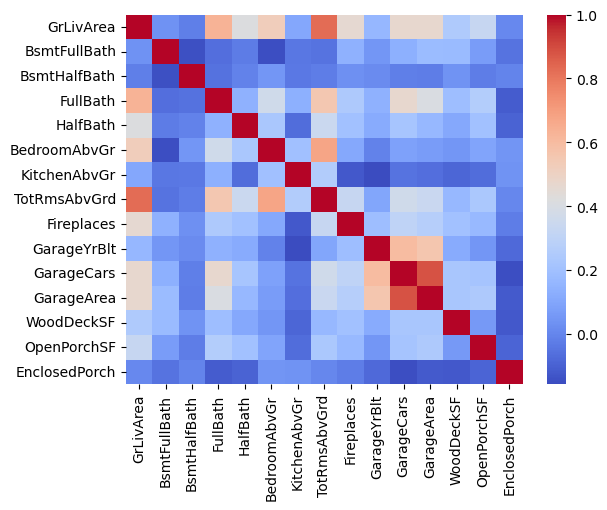

<Figure size 2000x1600 with 0 Axes>

In [396]:
# Remove two

sns.heatmap(corr_mtrx_2, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()



## Keep the more descriptive feature -> remove numberofcars feature

### Matrix 3

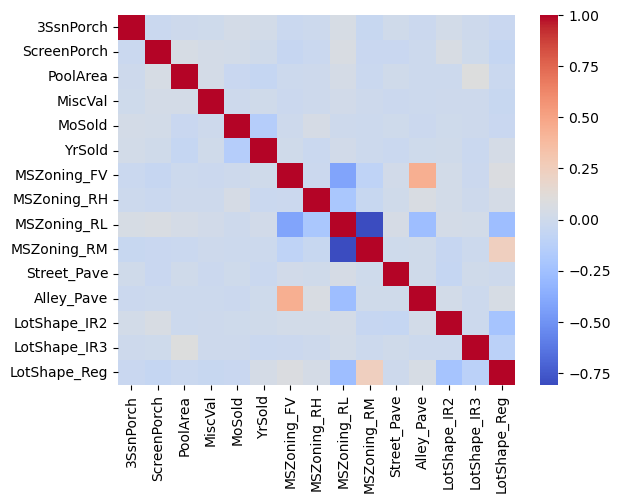

<Figure size 2000x1600 with 0 Axes>

In [28]:
# Remove two

sns.heatmap(corr_mtrx_3, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 4

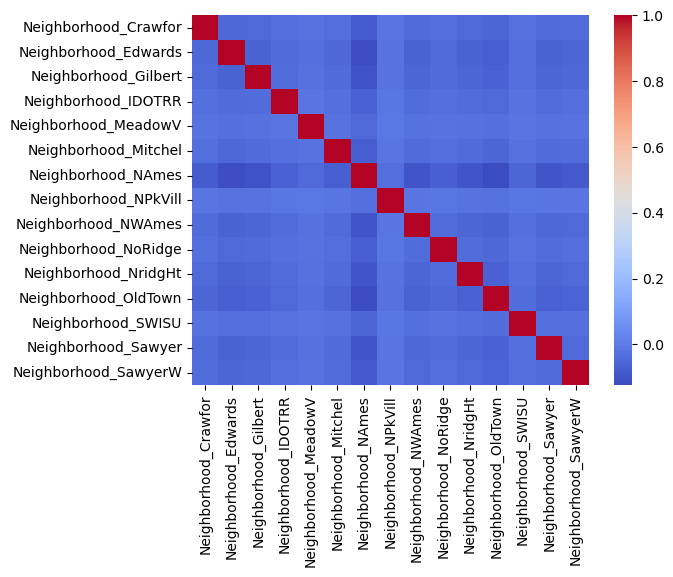

<Figure size 2000x1600 with 0 Axes>

In [29]:
# Remove one

sns.heatmap(corr_mtrx_4, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 5

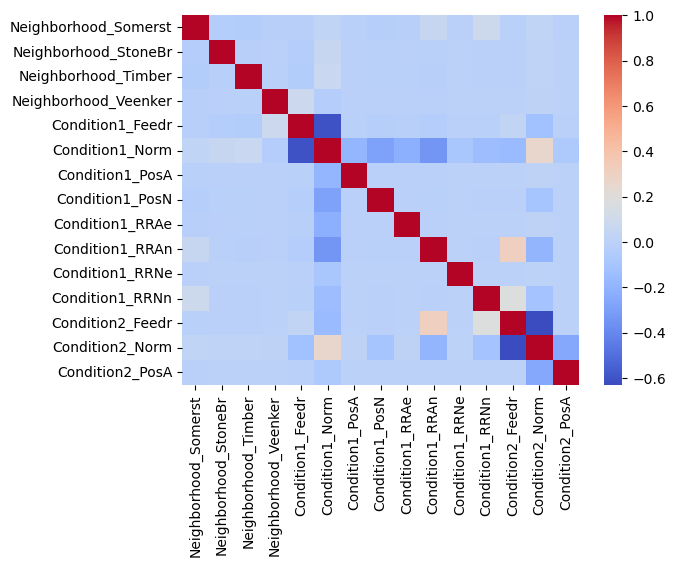

<Figure size 2000x1600 with 0 Axes>

In [30]:
sns.heatmap(corr_mtrx_5, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

# OK

### Matrix 6

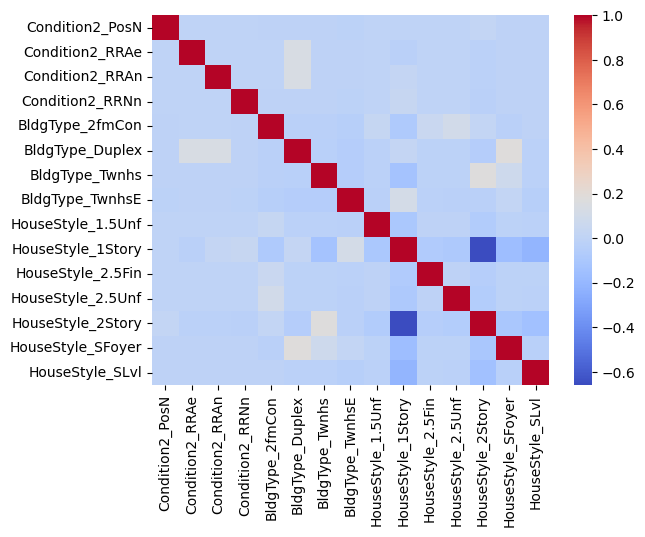

<Figure size 2000x1600 with 0 Axes>

In [31]:
# Possibly remove

sns.heatmap(corr_mtrx_6, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 7

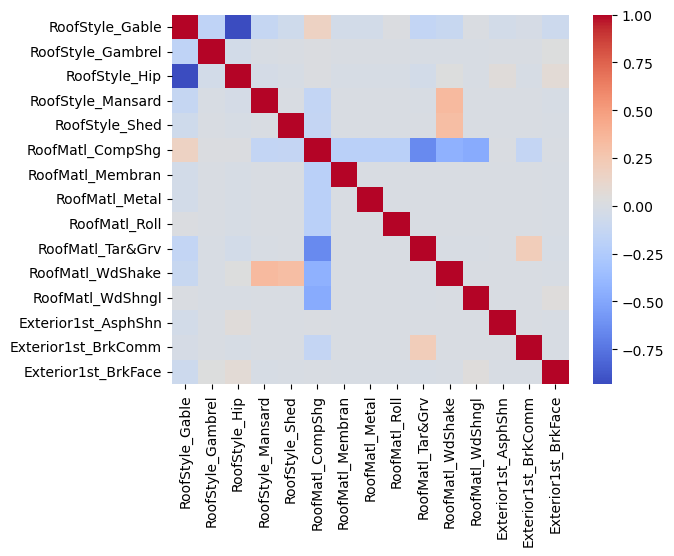

<Figure size 2000x1600 with 0 Axes>

In [32]:
# Possibly remove

sns.heatmap(corr_mtrx_7, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 8

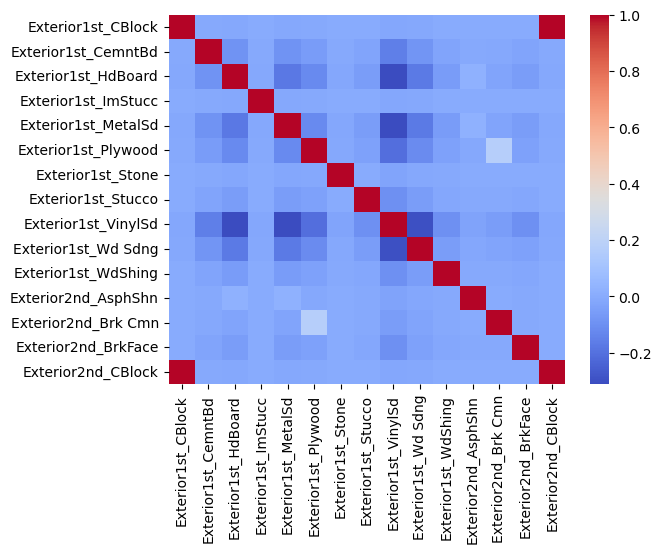

<Figure size 2000x1600 with 0 Axes>

In [33]:
# Possibly Remove

sns.heatmap(corr_mtrx_8, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 9

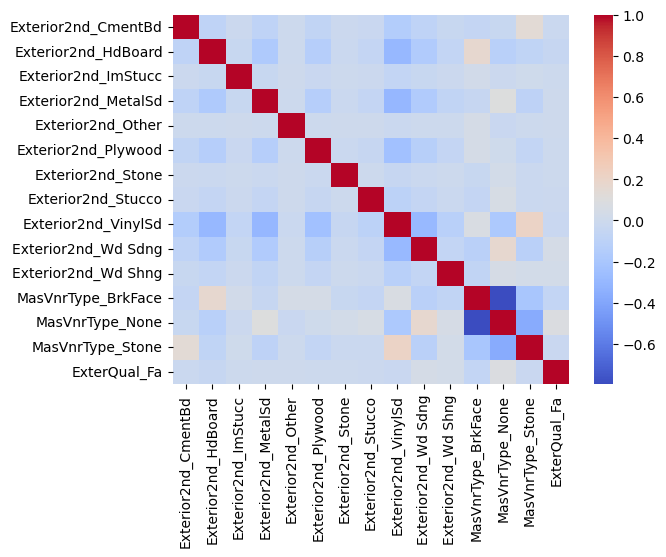

<Figure size 2000x1600 with 0 Axes>

In [34]:
sns.heatmap(corr_mtrx_9, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

# OK

### Matrix 10

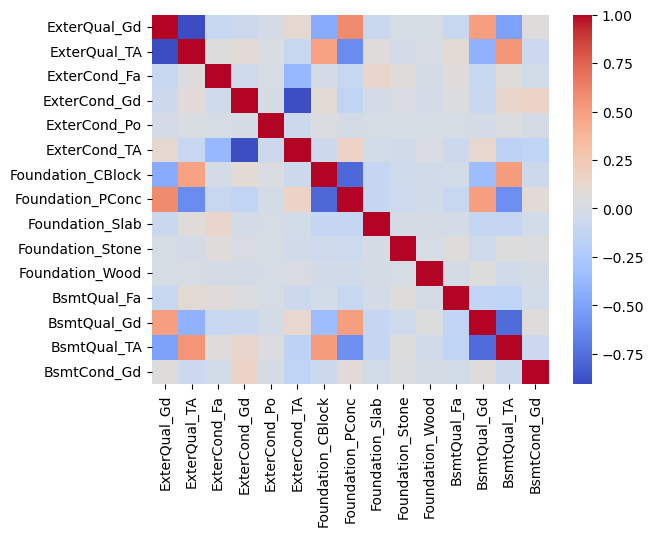

<Figure size 2000x1600 with 0 Axes>

In [35]:
sns.heatmap(corr_mtrx_10, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

# OK

### Matrix 11

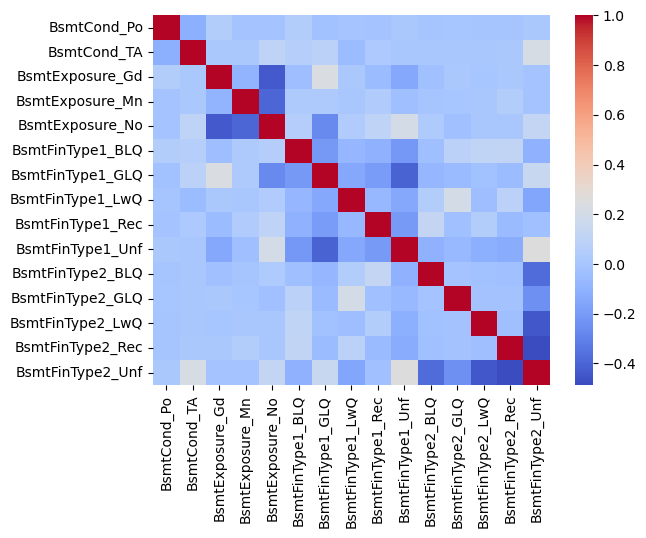

<Figure size 2000x1600 with 0 Axes>

In [36]:
## Drop two in here

sns.heatmap(corr_mtrx_11, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 12

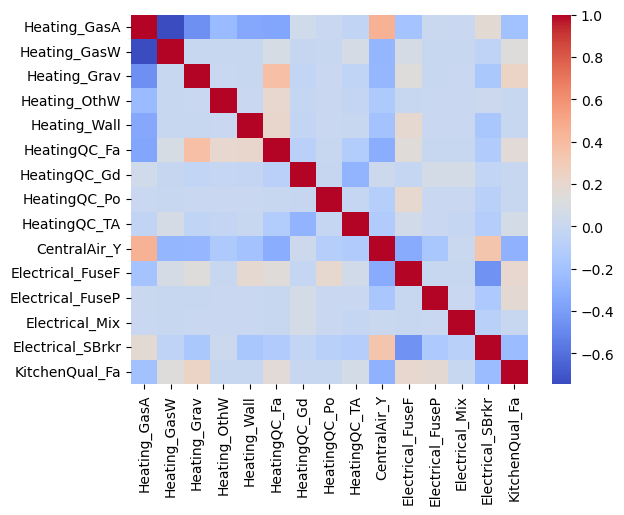

<Figure size 2000x1600 with 0 Axes>

In [37]:
## Might drop one

sns.heatmap(corr_mtrx_12, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 13

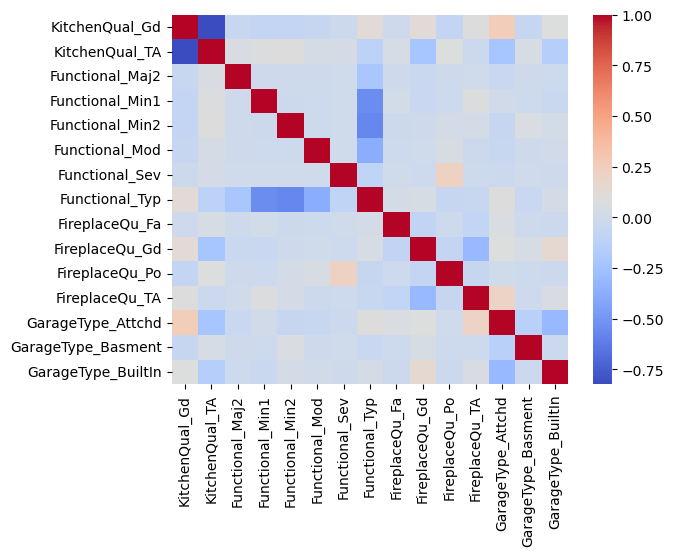

<Figure size 2000x1600 with 0 Axes>

In [38]:
sns.heatmap(corr_mtrx_13, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

# OK

### Matrix 14

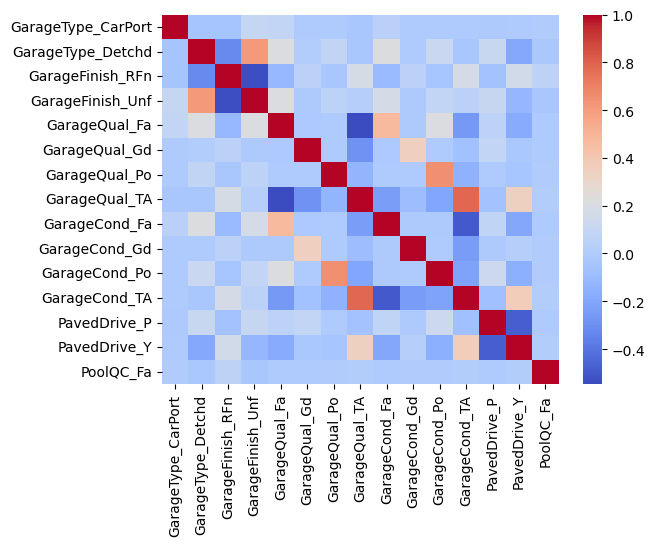

<Figure size 2000x1600 with 0 Axes>

In [39]:
## Might drop one of these

sns.heatmap(corr_mtrx_14, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 15

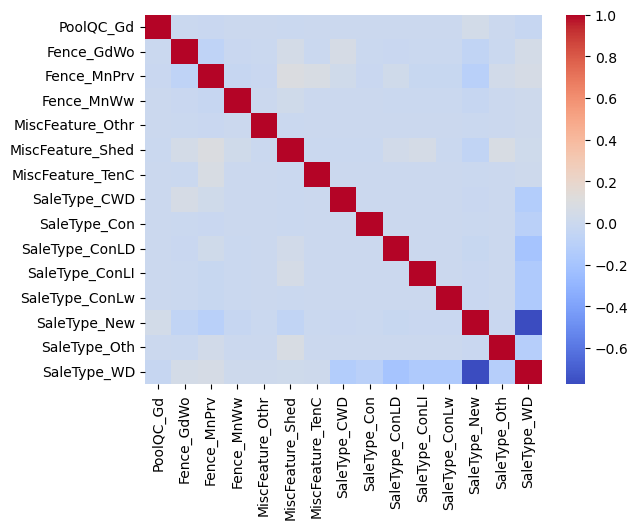

<Figure size 2000x1600 with 0 Axes>

In [40]:
## Might drop one of these

sns.heatmap(corr_mtrx_15, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

### Matrix 16

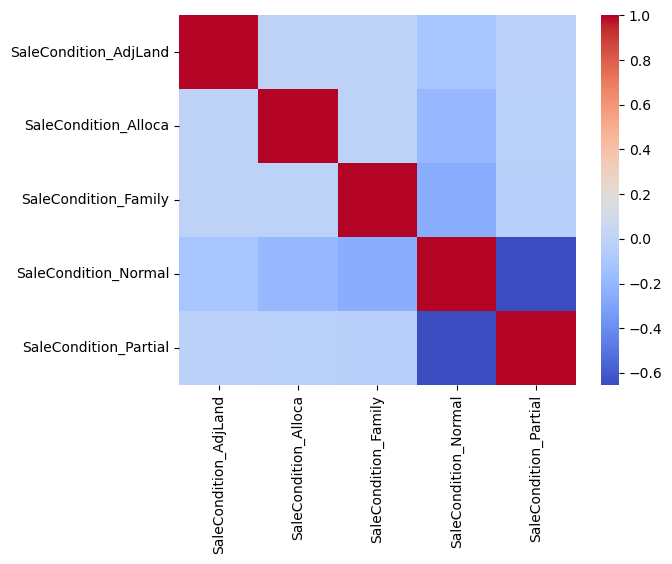

<Figure size 2000x1600 with 0 Axes>

In [41]:
sns.heatmap(corr_mtrx_16, cmap=cmap)
plt.figure(figsize=(20,16))
plt.show()

# OK

### 5.2 VIF (might do this, might not)
- Explanation of VIF
- VIF Calcuation
- Score and dropping values over 5/whatever threshold

---
# Lasso MLR Models

1. Lasso model explanation
2. Param tuning (alpha specifically)
3. Cross Validation (testing dif alphas and other params to find best model)
4. Model Equation
5. Model Evaluation and MSE
6. Important Columns
7. Model Display
8. Feature Engineering Additions

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [26]:
from sklearn.model_selection import train_test_split

## Original Lasso Model

In [27]:
X = houses_encoded
y = houses_target

In [708]:
Xclean = houses_encoded_engi
yclean = houses_encoded_engi_target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 70/30 look up

In [709]:
Xclean_train, Xclean_test, yclean_train, yclean_test = train_test_split(Xclean, yclean, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import Lasso

In [32]:
model_lasso = Lasso(alpha = 1)

In [33]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [34]:
model_lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  1.60261973e-06,  0.00000000e+00,
        0.00000000e+00,  2.45178782e-03,  1.38030751e-03,  3.81076738e-05,
        3.44477237e-05,  0.00000000e+00, -0.00000000e+00,  1.42461118e-04,
        0.00000000e+00,  9.46648905e-06, -0.00000000e+00,  3.11726413e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.10667524e-05,  0.00000000e+00,  2.97193191e-04,  1.50569911e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  9.34202076e-05,
       -4.04403377e-07, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [ ]:
model_lasso.intercept_

In [36]:
houses_encoded.columns[np.abs(model_lasso.coef_) > 0]

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'ScreenPorch', 'PoolArea'],
      dtype='object')

In [37]:
len(houses_encoded.columns[np.abs(model_lasso.coef_) > 0])

13

## Original Lasso Model Scoring

In [41]:
lasso_preds = model_lasso.predict(X_test)

In [42]:
mean_squared_error(y_test, lasso_preds)

0.03637563520995113

In [43]:
r2_score(y_test, lasso_preds)  ## at alpha of 1

0.8050750259065893

## Testing Different Alphas

In [234]:
alphas = [0.0001,0.0005,0.001, 0.005, 0.01,0.05, 0.1, 0.3, 1, 3, 5, 10, 15]

In [235]:
results = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse_1 = mean_squared_error(y_test, preds)
    r_sq_1 = r2_score(y_test, preds)
    
    results.append({'alpha': alpha, 'mse': mse_1, 'R^2': r_sq_1})

In [236]:
pd.DataFrame(results)

alpha       mse       R^2
0    0.0001  0.022056  0.881808
1    0.0005  0.020803  0.888524
2    0.0010  0.020227  0.891611
3    0.0050  0.022293  0.880540
4    0.0100  0.023818  0.872365
5    0.0500  0.029042  0.844373
6    0.1000  0.032426  0.826241
7    0.3000  0.032786  0.824311
8    1.0000  0.036376  0.805075
9    3.0000  0.048706  0.739000
10   5.0000  0.051869  0.722053
11  10.0000  0.055579  0.702170
12  15.0000  0.060681  0.674829

---
## Lasso Tuned Model Testing and Scoring

- Better score but more coefficients and more columns needed to predict
- If you do not have all the columns might not be able to predict accuractly
- More columns because alpha is smaller and less penalization happened
- Alpha of 1 has only 13 coefficients compared to 86 for the best model

In [595]:
model_lasso_alpha_tuned = Lasso(alpha = 0.0010)

In [596]:
model_lasso_alpha_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [597]:
model_lasso_alpha_tuned.coef_

array([-7.49829182e-04, -2.40667110e-04,  1.51388242e-06,  6.74093887e-02,
        3.97018156e-02,  1.79130625e-03,  1.28422371e-03, -1.35889013e-05,
        2.93688146e-06,  4.88792462e-05,  9.90355934e-06,  7.94188621e-06,
        1.75662858e-04,  1.89657233e-04,  2.00785557e-04,  2.49088154e-05,
        5.58576716e-02,  0.00000000e+00,  1.48518343e-02,  1.53068412e-02,
        9.49312537e-03, -0.00000000e+00,  1.11852957e-02,  3.63777665e-02,
        2.66940477e-05,  5.64615589e-02,  3.01457577e-05,  1.38709619e-04,
        2.31956652e-06,  1.44401087e-04,  2.69308942e-04,  3.15315942e-04,
       -2.73083088e-04, -6.07502644e-06, -0.00000000e+00, -4.59835758e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -5.16073528e-02,
        0.00000000e+00,  0.00000000e+00,  2.07117626e-03, -2.60257154e-02,
        0.00000000e+00,  1.58986803e-02,  0.00000000e+00,  1.00171572e-02,
       -0.00000000e+00,  4.09772587e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [240]:
model_lasso_alpha_tuned.intercept_

13.70400513616475

In [241]:
houses_encoded.columns[np.abs(model_lasso_alpha_tuned.coef_) > 0]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'BldgType_2fmCon', 'BldgType_Twnhs',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'Exterior1st_BrkFace',
       'Exterior1st_HdBoard', 'Ext

In [242]:
len(houses_encoded.columns[np.abs(model_lasso_alpha_tuned.coef_) > 0])

81

In [243]:
lasso_preds_tuned = model_lasso_alpha_tuned.predict(X_test)

In [244]:
mean_squared_error(y_test, lasso_preds_tuned)

0.020226929614124336

---
## Feature Engi Lasso Tuned Model Testing and Scoring
- Try standard scalering this is still not converging 
- Increase max iters but not too high
- Change alpha with for loop

In [352]:
# Xclean/yclean vars #

In [736]:
model_lasso_engi = Lasso(alpha=.001, max_iter=1000)

In [737]:
model_lasso_engi.fit(Xclean_train, yclean_train)

Lasso(alpha=0.001)

In [738]:
lasso_preds_engi = model_lasso_engi.predict(Xclean_test)

In [739]:
mean_squared_error(yclean_test, lasso_preds_engi)

0.016114005895026016

In [740]:
np.sqrt(mean_squared_error(yclean_test, lasso_preds_engi))

0.12694095436472036

---
## Lasso Tuned and Normalized

In [165]:
model_lasso_alpha_tuned_norm = Lasso(alpha = .0001, normalize=True)

In [166]:
model_lasso_alpha_tuned_norm.fit(X_train, y_train)

C:\Users\teste\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.0001, normalize=True)

In [167]:
lasso_preds_norm = model_lasso_alpha_tuned_norm.predict(X_test)

In [168]:
mean_squared_error(y_test, lasso_preds_norm)

0.024673503950483556

- Normalizing does not lower MSE

---
## Ridge Regression
- Does not penalize the same way as Lasso
- Coefs will never be 0, just get smaller using squared values

In [169]:
from sklearn.linear_model import Ridge

In [170]:
model_ridge = Ridge(alpha=10)

In [171]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [172]:
model_ridge.coef_

array([-6.49037328e-04, -2.56135406e-04,  1.28460977e-06,  5.80452198e-02,
        3.66316447e-02,  1.37846287e-03,  1.15324088e-03, -8.97864858e-07,
       -1.94069607e-05,  4.70915096e-05, -7.63458381e-06,  2.00499728e-05,
        3.54722431e-05,  4.51297641e-05,  8.33038160e-05,  1.63905822e-04,
        5.39998882e-02,  1.10780616e-02,  2.75844142e-02,  2.91870278e-02,
        1.57199346e-02, -2.65878981e-02,  1.10637347e-02,  2.82227155e-02,
        3.25177592e-05,  5.56990432e-02,  1.66849350e-05,  1.29970507e-04,
       -9.81325611e-06,  1.36370032e-04,  2.65145285e-04,  2.70741116e-04,
       -1.94029814e-04, -3.44347195e-06,  1.65013847e-04, -4.38219206e-03,
        3.35596432e-02,  2.10970508e-02,  3.23397032e-02, -1.60220250e-02,
        1.48149520e-03,  2.37147581e-02,  3.00847803e-02, -5.93185400e-02,
        4.54378027e-03,  6.47902209e-02,  2.76644710e-02,  4.71103525e-02,
       -1.94731801e-02,  4.06702844e-02, -2.48265488e-02, -1.21201809e-02,
       -7.07018178e-03,  

In [173]:
model_ridge.intercept_

14.282993539574253

In [174]:
y_pred_ridge = model_ridge.predict(X_test)

In [175]:
mean_squared_error(y_test, y_pred_ridge)

0.01916163980723221

In [245]:
ridge_alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15]

In [246]:
results_ridge = []

for alpha in ridge_alphas:
    model_r = Ridge(alpha=alpha)
    model_r.fit(X_train, y_train)
    preds_r = model_r.predict(X_test)
    
    mse_r = mean_squared_error(y_test, preds_r)
    r_sq_r = r2_score(y_test, preds_r)
    
    results_ridge.append({'alpha': alpha, 'mse': mse_r, 'R^2': r_sq_r})

In [247]:
pd.DataFrame(results_ridge)

alpha       mse       R^2
0   0.05  0.023056  0.876450
1   0.10  0.020925  0.887870
2   0.30  0.019726  0.894294
3   1.00  0.019262  0.896782
4   3.00  0.019158  0.897340
5   5.00  0.019151  0.897377
6  10.00  0.019162  0.897319
7  15.00  0.019190  0.897167

---
## Ridge Tuned Model
- Alpha of 5 has smallest MSE and highest R^2

In [179]:
model_ridge_tuned = Ridge(alpha=5)

In [180]:
model_ridge_tuned.fit(X_train, y_train)

Ridge(alpha=5)

In [76]:
model_ridge_tuned.coef_

array([-6.13540683e-04, -2.38037591e-04,  1.24796995e-06,  5.43752008e-02,
        3.55041254e-02,  1.32434929e-03,  1.10916952e-03, -2.10811505e-08,
       -2.03909489e-05,  4.85584428e-05, -7.57645302e-06,  2.05910482e-05,
        3.04017703e-05,  3.90837759e-05,  1.01677930e-04,  1.71163489e-04,
        5.27898600e-02,  1.02506875e-02,  2.91128811e-02,  3.05793284e-02,
        1.65355556e-02, -3.53384337e-02,  1.02200594e-02,  2.63715550e-02,
        3.57462374e-05,  5.51706256e-02,  1.38592661e-05,  1.28935224e-04,
       -3.86417498e-06,  1.29280663e-04,  2.64091574e-04,  2.56403820e-04,
       -1.52808171e-04, -2.48561973e-06,  1.22521437e-04, -4.14182563e-03,
        4.77841479e-02,  3.79943683e-02,  4.43627541e-02,  3.61975469e-03,
        2.75769127e-03,  2.87261826e-02,  3.41857434e-02, -7.47808221e-02,
        4.97980576e-03,  7.86472430e-02,  4.10202820e-02,  5.80441614e-02,
       -3.56872649e-02,  4.23446801e-02, -3.10662930e-02, -2.33527515e-02,
       -7.78316222e-03,  

In [181]:
y_pred_ridge_tuned = model_ridge_tuned.predict(X_test)

In [182]:
mean_squared_error(y_test, y_pred_ridge_tuned)

0.01915077457510339

In [183]:
len(houses_encoded.columns[np.abs(model_ridge_tuned.coef_) > 0])

#two coefs rouding error to basically 0 -> not actually 0

243

---
## Ridge Tuned and Normalized Model

In [297]:
model_ridge_tuned_norm = Ridge(alpha=.2, normalize=True)

In [298]:
model_ridge_tuned_norm.fit(X_train, y_train)

C:\Users\teste\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.2, normalize=True)

In [299]:
y_pred_ridge_tuned_norm = model_ridge_tuned_norm.predict(X_test)

In [300]:
mean_squared_error(y_test, y_pred_ridge_tuned_norm)

0.023269263255067847

- Normalizing does not improve MSE

---
## Ridge Feature Engi Model

In [509]:
from sklearn.model_selection import cross_val_score

In [749]:
model_ridge_engi = Ridge(alpha=10)

In [750]:
model_ridge_engi.fit(Xclean_train, yclean_train)

Ridge(alpha=10)

In [751]:
y_pred_ridge_engi = model_ridge_engi.predict(Xclean_test)

In [752]:
mean_squared_error(yclean_test, y_pred_ridge_engi)

0.015728547775057906

In [753]:
np.sqrt(mean_squared_error(yclean_test, y_pred_ridge_engi))

0.1254135071475872

In [746]:
cv_scores_ridge = cross_val_score(model_ridge_engi, Xclean, yclean, cv=5, scoring='neg_mean_squared_error')

In [747]:
np.sqrt(-cv_scores_ridge)

array([0.11506523, 0.1270264 , 0.12266121, 0.10790471, 0.11342038])

In [748]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    model_ridge_engi = Ridge(alpha=alpha)
    cv_scores_ridge = cross_val_score(model_ridge_engi, Xclean, yclean, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores_ridge)
    mean_rmse = np.mean(rmse_scores)
    
    if mean_rmse < best_rmse:
        best_alpha = alpha
        best_rmse = mean_rmse

print("Best Alpha:", best_alpha)
print("Best RMSE:", best_rmse)

Best Alpha: 10
Best RMSE: 0.1165525949955321


In [754]:
results_ridge = []

for alpha in ridge_alphas:
    model_r = Ridge(alpha=alpha)
    model_r.fit(Xclean_train, yclean_train)
    preds_r = model_r.predict(Xclean_test)
    
    mse_r = mean_squared_error(yclean_test, preds_r)
    r_sq_r = r2_score(yclean_test, preds_r)
    
    results_ridge.append({'alpha': alpha, 'mse': mse_r, 'R^2': r_sq_r})

pd.DataFrame(results_ridge)   

alpha       mse       R^2
0   0.05  0.017587  0.888647
1   0.10  0.017401  0.889824
2   0.30  0.017005  0.892335
3   1.00  0.016448  0.895860
4   3.00  0.015973  0.898870
5   5.00  0.015825  0.899802
6  10.00  0.015729  0.900415
7  15.00  0.015730  0.900406

---
## Elastic Net Regression
- Combination of ridge and lasso
- L1 and alpha tunable params
- L1 of 0 = pure ridge
- L1 of 1 = pure lasso
- Try different alphas 
- L1 ratios to try = 0.1, 0.2, 0.5, 0.7, 0.9

In [188]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [189]:
model_elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)

In [190]:
model_elastic_net.fit(X_train, y_train)

ElasticNet(alpha=1)

In [191]:
y_pred_elastic = model_elastic_net.predict(X_test)

In [192]:
mean_squared_error(y_test, y_pred_elastic)

0.03344327347732663

## CV of Elastic Net Model

In [193]:
from sklearn.model_selection import GridSearchCV

In [301]:
EN_CV = ElasticNetCV(alphas = [.0001, .001, .01, .1, 1, 10, 15, 30, 50],
                    l1_ratio= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
                    cv=5,
                    max_iter=100000)

In [302]:
EN_CV.fit(X_train, y_train)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 30, 50], cv=5,
             l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             max_iter=100000)

In [303]:
EN_CV.alpha_

0.01

In [304]:
EN_CV.l1_ratio_

0.1

---
## Tuned EN Model

In [305]:
model_en_tuned = ElasticNet(alpha=0.01, l1_ratio=.1)

In [306]:
model_en_tuned.fit(X_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.1)

In [307]:
y_pred_elastic_tuned = model_en_tuned.predict(X_test)

In [308]:
mean_squared_error(y_test, y_pred_elastic_tuned)

0.020219600277385442

In [311]:
np.sqrt(mean_squared_error(y_test, y_pred_elastic_tuned))

0.14219564085226186

## Model Equation: 
- Little Different Now Because of T/T splitting -> will change

- In case I want to show it on slides

y = 1.6e-06 * x1 + 2.4e-03 * x2 + 1.4e-03 * x3 + 4.3e-05 * x4 + 4.7e-05 * x5 + 1.6e-04 * x6 + 1.3e-05 * x7 + 3.2e-04 * x8 + 6.9e-05 * x9 + 2.8e-04 * x10 + 1.5e-04 * x11 + 1e-04 * x12 - 2.5e-07 * x13  + 3.5

---
## Random Forest Model

1. Random Forest Model Set up
2. Train Test Splitting
3. Model Tuning
4. Model Evaluation and Looking at Important Features
5. Cross Validation
6. Model Display

In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
from sklearn.ensemble import RandomForestRegressor

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
label_encode = LabelEncoder()

In [209]:
houses_label_encode = houses_train.copy()

In [210]:
houses_label_encode

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [211]:
houses_label_encode = houses_label_encode.drop('Id', axis = 1)

In [212]:
houses_label_encode.fillna(0, inplace=True)

In [218]:
label_encoders = {}

for col in houses_label_encode.columns:
    if houses_label_encode[col].dtype == 'object':
        houses_label_encode[col] = houses_label_encode[col].astype(str)
        label_encoder = LabelEncoder()
        houses_label_encode[col] = label_encoder.fit_transform(houses_label_encode[col])
        label_encoders[col] = label_encoder

In [220]:
houses_label_encode

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      0         3   
1             20         3         80.0     9600       1      0         3   
2             60         3         68.0    11250       1      0         0   
3             70         3         60.0     9550       1      0         0   
4             60         3         84.0    14260       1      0         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      0         3   
1456          20         3         85.0    13175       1      0         3   
1457          70         3         66.0     9042       1      0         3   
1458          20         3         68.0     9717       1      0         3   
1459          20         3         75.0     9937       1      0         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               3          0          4          0             5           2   
1               3          0          2          0            24           1   
2               3          0          4          0             5           2   
3               3          0          0          0             6           2   
4               3          0          2          0            15           2   
...           ...        ...        ...        ...           ...         ...   
1455            3          0          4          0             8           2   
1456            3          0          4          0            14           2   
1457            3          0          4          0             6           2   
1458            3          0          4          0            12           2   
1459            3          0          4          0             7           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              2         0           5            7            5       2003   
1              2         0           2            6            8       1976   
2              2         0           5            7            5       2001   
3              2         0           5            7            5       1915   
4              2         0           5            8            5       2000   
...          ...       ...         ...          ...          ...        ...   
1455           2         0           5            6            5       1999   
1456           2         0           2            6            6       1978   
1457           2         0           5            7            9       1941   
1458           2         0           2            5            6       1950   
1459           2         0           2            5            6       1965   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             2003          1         1           12           13           2   
1             1976          1         1            8            8           3   
2             2002          1         1           12           13           2   
3             1970          1         1           13           15           3   
4             2000          1         1           12           13           2   
...            ...        ...       ...          ...          ...         ...   
1455          2000          1         1           12           13           3   
1456          1988          1         1            9           10           4   
1457          2006          1         1            5            5           3   
1458          1996          3         1            8            8           3   
1459          1965          1         1            6            6           3   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          196.0          2          4           2         3         4   
1            0.0          3          4           1

In [221]:
X1 = houses_label_encode.drop('SalePrice', axis = 1)
y1 = houses_label_encode['SalePrice']


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

## Label Encoded RF
- Feature importances seem odd

In [222]:
model_forest_label = RandomForestRegressor(n_estimators=100)

In [223]:
model_forest_label.fit(X1_train, y1_train)

RandomForestRegressor()

In [224]:
model_forest_label.predict(X1_test)

array([11.86002237, 12.22815726, 11.79984081, 12.35700653, 12.25095996,
       11.16040672, 12.16356626, 11.51293123, 11.96679557, 11.79565769,
       12.12969925, 11.95564111, 11.70644776, 12.40599774, 12.12030861,
       11.80654466, 12.25527856, 11.7703448 , 12.6649741 , 12.48925686,
       12.11674245, 12.30510272, 12.24798212, 12.41958306, 11.59698903,
       11.79295531, 11.87781145, 11.81288396, 11.67346112, 12.13401752,
       11.78476262, 11.53842201, 11.39320633, 12.0652544 , 11.90664399,
       12.03682635, 12.35233656, 11.88865271, 12.29847742, 12.23604531,
       12.18469313, 12.17933634, 12.20918603, 11.79101809, 11.74385514,
       12.5342017 , 11.81949523, 12.32933931, 12.26023183, 12.08719087,
       11.89721333, 12.19432123, 11.51488917, 11.79005581, 11.69530773,
       12.66628305, 11.71872319, 11.86025814, 11.68956434, 11.83469378,
       12.64134131, 11.94404728, 12.55288229, 12.51910279, 12.08987747,
       11.71059915, 11.725069  , 12.22999576, 11.96057093, 11.72

In [225]:
model_forest_label.feature_importances_

array([2.25244660e-03, 9.78959224e-03, 4.48796521e-03, 1.20980516e-02,
       9.38805214e-06, 7.19283481e-04, 1.03660591e-03, 1.56957484e-03,
       1.67050855e-06, 7.27648982e-04, 1.00916958e-03, 6.66544420e-03,
       9.64822027e-04, 2.09740565e-04, 7.82289067e-04, 1.49859126e-03,
       5.35831110e-01, 1.16144854e-02, 1.79025329e-02, 9.21028146e-03,
       6.67922818e-04, 1.44995585e-04, 2.04659922e-03, 1.93813721e-03,
       6.78663824e-04, 4.50680134e-03, 1.37518052e-03, 1.66043839e-03,
       8.97764280e-04, 2.20863305e-03, 7.33085744e-04, 1.19823252e-03,
       2.33812729e-03, 2.03933120e-02, 3.70086122e-04, 3.56050592e-04,
       4.50452891e-03, 4.87526605e-02, 3.96841348e-04, 1.42508956e-03,
       1.36052957e-02, 1.14603144e-03, 2.36021234e-02, 8.23689346e-03,
       2.05887119e-04, 1.07418457e-01, 1.06175710e-03, 3.33110091e-04,
       2.70078690e-03, 1.42572274e-03, 1.63313988e-03, 1.72977252e-03,
       2.14048532e-03, 2.99338677e-03, 7.02998731e-04, 3.56472200e-03,
      

## One Hot Encoded RF

In [214]:
model_forest_dummy = RandomForestRegressor(n_estimators=100)

In [215]:
model_forest_dummy.fit(X_train, y_train)

RandomForestRegressor()

In [216]:
model_forest_dummy.predict(X_test)

array([11.84420775, 12.66837646, 11.66765049, 11.96394317, 12.64732451,
       11.34626963, 12.26640375, 11.94057695, 11.34711889, 11.73235566,
       11.99759209, 11.67449913, 11.57592592, 12.17661824, 12.0981033 ,
       11.76397199, 12.18205276, 11.79213999, 11.65364382, 12.21844765,
       12.01690305, 12.27196589, 12.06464255, 11.71064622, 12.1744911 ,
       12.039067  , 12.12462705, 11.61272044, 12.07326691, 12.17185464,
       11.72213398, 12.4553882 , 12.01245148, 11.62951373, 12.46164004,
       11.87533876, 11.85489369, 12.22810606, 12.62517923, 11.56263319,
       11.72077121, 12.36124912, 11.70300076, 12.77998368, 11.82070388,
       11.78721596, 11.68396033, 11.76649244, 12.87424698, 11.88552978,
       11.69838242, 12.14085175, 11.66361469, 12.65935749, 11.84116275,
       12.39039155, 12.17505371, 11.91778223, 11.87465969, 11.60503356,
       11.1813427 , 11.89307739, 12.63110615, 12.46823262, 12.56237008,
       12.21260614, 11.59973588, 12.65418507, 11.65831252, 12.00

In [217]:
model_forest_dummy.feature_importances_

array([2.59900298e-03, 4.76343277e-03, 1.56437555e-02, 5.45008490e-01,
       1.05707933e-02, 1.36104196e-02, 8.65659548e-03, 2.55573680e-03,
       2.21624087e-02, 2.44205315e-04, 5.75760531e-03, 3.69544812e-02,
       2.46058138e-02, 7.52770476e-03, 1.53969698e-04, 1.11063615e-01,
       1.25008090e-03, 1.75669351e-04, 1.08834402e-03, 7.52808197e-04,
       2.22221234e-03, 1.99832067e-03, 2.14810965e-03, 7.73165793e-03,
       7.66089925e-03, 3.98054977e-02, 2.93330480e-02, 3.28304948e-03,
       5.52263645e-03, 1.64670567e-03, 9.23585638e-05, 7.38287033e-04,
       8.03876874e-05, 1.02081084e-04, 3.90451831e-03, 1.66411176e-03,
       9.14926368e-05, 7.07056554e-05, 9.73261834e-04, 3.04561818e-03,
       1.34266722e-06, 1.02455212e-04, 8.24065979e-05, 2.65819843e-05,
       1.36019236e-03, 3.17370035e-04, 7.14866791e-05, 5.15380964e-04,
       4.66935645e-06, 3.24584145e-04, 1.06595025e-04, 3.99561714e-05,
       6.55154287e-04, 1.81995402e-04, 3.47353151e-05, 1.39982735e-05,
      

---
## Feature Engi RF
- Using one hot encoded dataset with cols removed

In [566]:
model_forest_engi = RandomForestRegressor(n_estimators=100)

In [567]:
model_forest_engi.fit(Xclean_train, yclean_train)

RandomForestRegressor()

In [568]:
model_forest_engi.predict(Xclean_test)

array([[7.1324e+02, 5.3950e+01, 5.5910e+01, ..., 1.0000e-02, 9.5000e-01,
        4.0000e-02],
       [8.8743e+02, 1.1380e+02, 3.8750e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.1437e+02, 3.9500e+01, 6.6840e+01, ..., 0.0000e+00, 7.7000e-01,
        1.6000e-01],
       ...,
       [6.5639e+02, 4.2300e+01, 6.8400e+01, ..., 0.0000e+00, 9.1000e-01,
        0.0000e+00],
       [6.1580e+02, 5.6400e+01, 5.7570e+01, ..., 0.0000e+00, 8.5000e-01,
        1.5000e-01],
       [6.4183e+02, 4.0550e+01, 6.2080e+01, ..., 0.0000e+00, 8.4000e-01,
        0.0000e+00]])

In [569]:
model_forest_engi.feature_importances_

array([1.94196038e-04, 4.79825147e-04, 3.30701658e-04, 5.32359663e-03,
       1.19556185e-04, 2.66627225e-05, 8.81980070e-05, 8.26020251e-04,
       1.33108389e-04, 6.83401728e-05, 2.34313657e-04, 5.16399422e-04,
       2.56750910e-04, 6.08776160e-05, 3.96350419e-05, 2.05818896e-06,
       8.21692132e-05, 2.41413661e-04, 1.89230246e-06, 1.12243437e-04,
       1.51868434e-05, 4.61773699e-05, 7.18917851e-07, 1.69610725e-05,
       5.11299187e-04, 1.75600360e-04, 4.13891077e-04, 1.10660361e-04,
       3.62636976e-06, 1.84121363e-06, 2.92536588e-05, 3.59243193e-07,
       8.96876964e-05, 1.17285426e-04, 4.12855056e-05, 9.81210754e-01,
       1.06525394e-06, 2.58755726e-07, 2.98787717e-06, 2.29900505e-04,
       3.49392151e-04, 7.44020472e-04, 8.81912025e-06, 7.92935769e-06,
       4.67405030e-04, 8.82863758e-06, 1.34906243e-09, 1.98132437e-05,
       6.07602769e-07, 2.93534399e-07, 1.10110475e-05, 1.20673869e-05,
       1.56446977e-03, 1.11647682e-08, 1.55656754e-06, 6.61741365e-07,
      

## Grid Search CV

- trying on both label and one hot encoded models

### Tunable Params

- n_estimators = number of trees
- max_depth = depth of each tree, controlling helps overfit, start at 10 or 20
- min_samples_split = min values required to split an internal node, larger values make model more conservative
- min_samples_leaf = min num of samples to be in leaf node, prevents overfitting
- max_features = can be integer or ratio (square root of features), controls diversity of tree

In [226]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [571]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')



grid_search_label = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')



grid_search_engi = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')

In [228]:
## One Hot Encoded GS CV

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [231]:
## Label Encoded GS CV

grid_search_label.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [755]:
## Engi Features RF

grid_search_engi.fit(Xclean_train, yclean_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [229]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [230]:
grid_search.best_score_

-0.021093116405494113

In [232]:
grid_search_label.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [233]:
grid_search_label.best_score_

-0.022427058131075643

In [756]:
grid_search_engi.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [757]:
grid_search_engi.best_score_

-0.01990000642969248

In [759]:
np.sqrt(-grid_search_engi.best_score_)

0.14106738258609777

In [762]:
model_forest_final = RandomForestRegressor(n_estimators=100, max_depth= None, min_samples_leaf=2, min_samples_split=5)

In [763]:
model_forest_final.fit(Xclean_train, yclean_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5)

## Model Scoring
- Scoring RF
    - MSE
    - RMSE
    - R^2

## Graphing Feature Importance

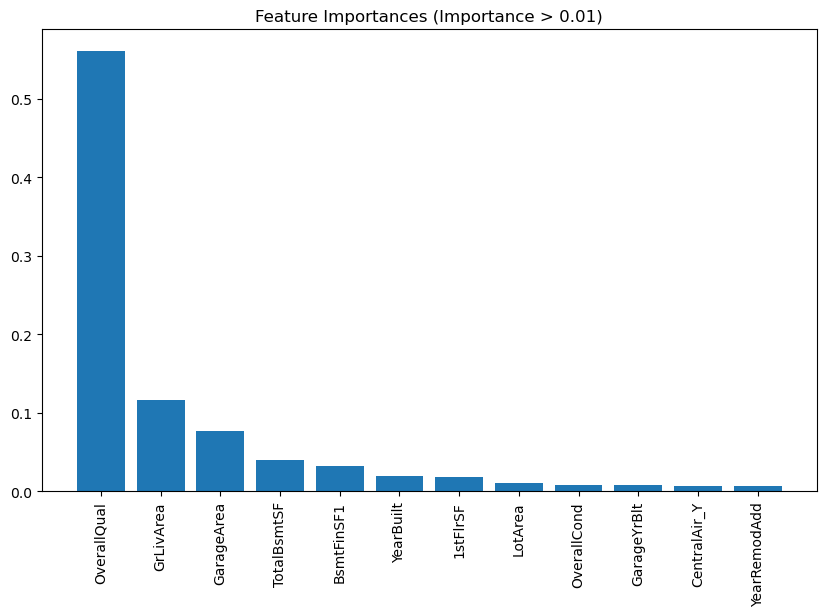

In [764]:
importances = model_forest_final.feature_importances_
feature_names = houses_encoded_engi.columns

threshold = 0.006
selected_indices = np.where(importances > threshold)
selected_importances = importances[selected_indices]
selected_feature_names = feature_names[selected_indices]
indices = np.argsort(selected_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Importance > 0.01)")
plt.bar(range(len(selected_importances)), selected_importances[indices], align="center")
plt.xticks(range(len(selected_importances)), selected_feature_names[indices], rotation=90)
plt.show()

In [55]:
## model valuing OverallQual higher than lasso MLR because of feature interactions?

## Visualizing RF Model

In [769]:
houses_encoded_engi_target.name = 'SalePrice'

In [772]:
df = pd.DataFrame(houses_encoded_engi_target, columns=['SalePrice'])

In [770]:
houses_encoded_engi_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1456, dtype: float64

In [765]:
from sklearn.tree import export_graphviz
from sklearn import tree

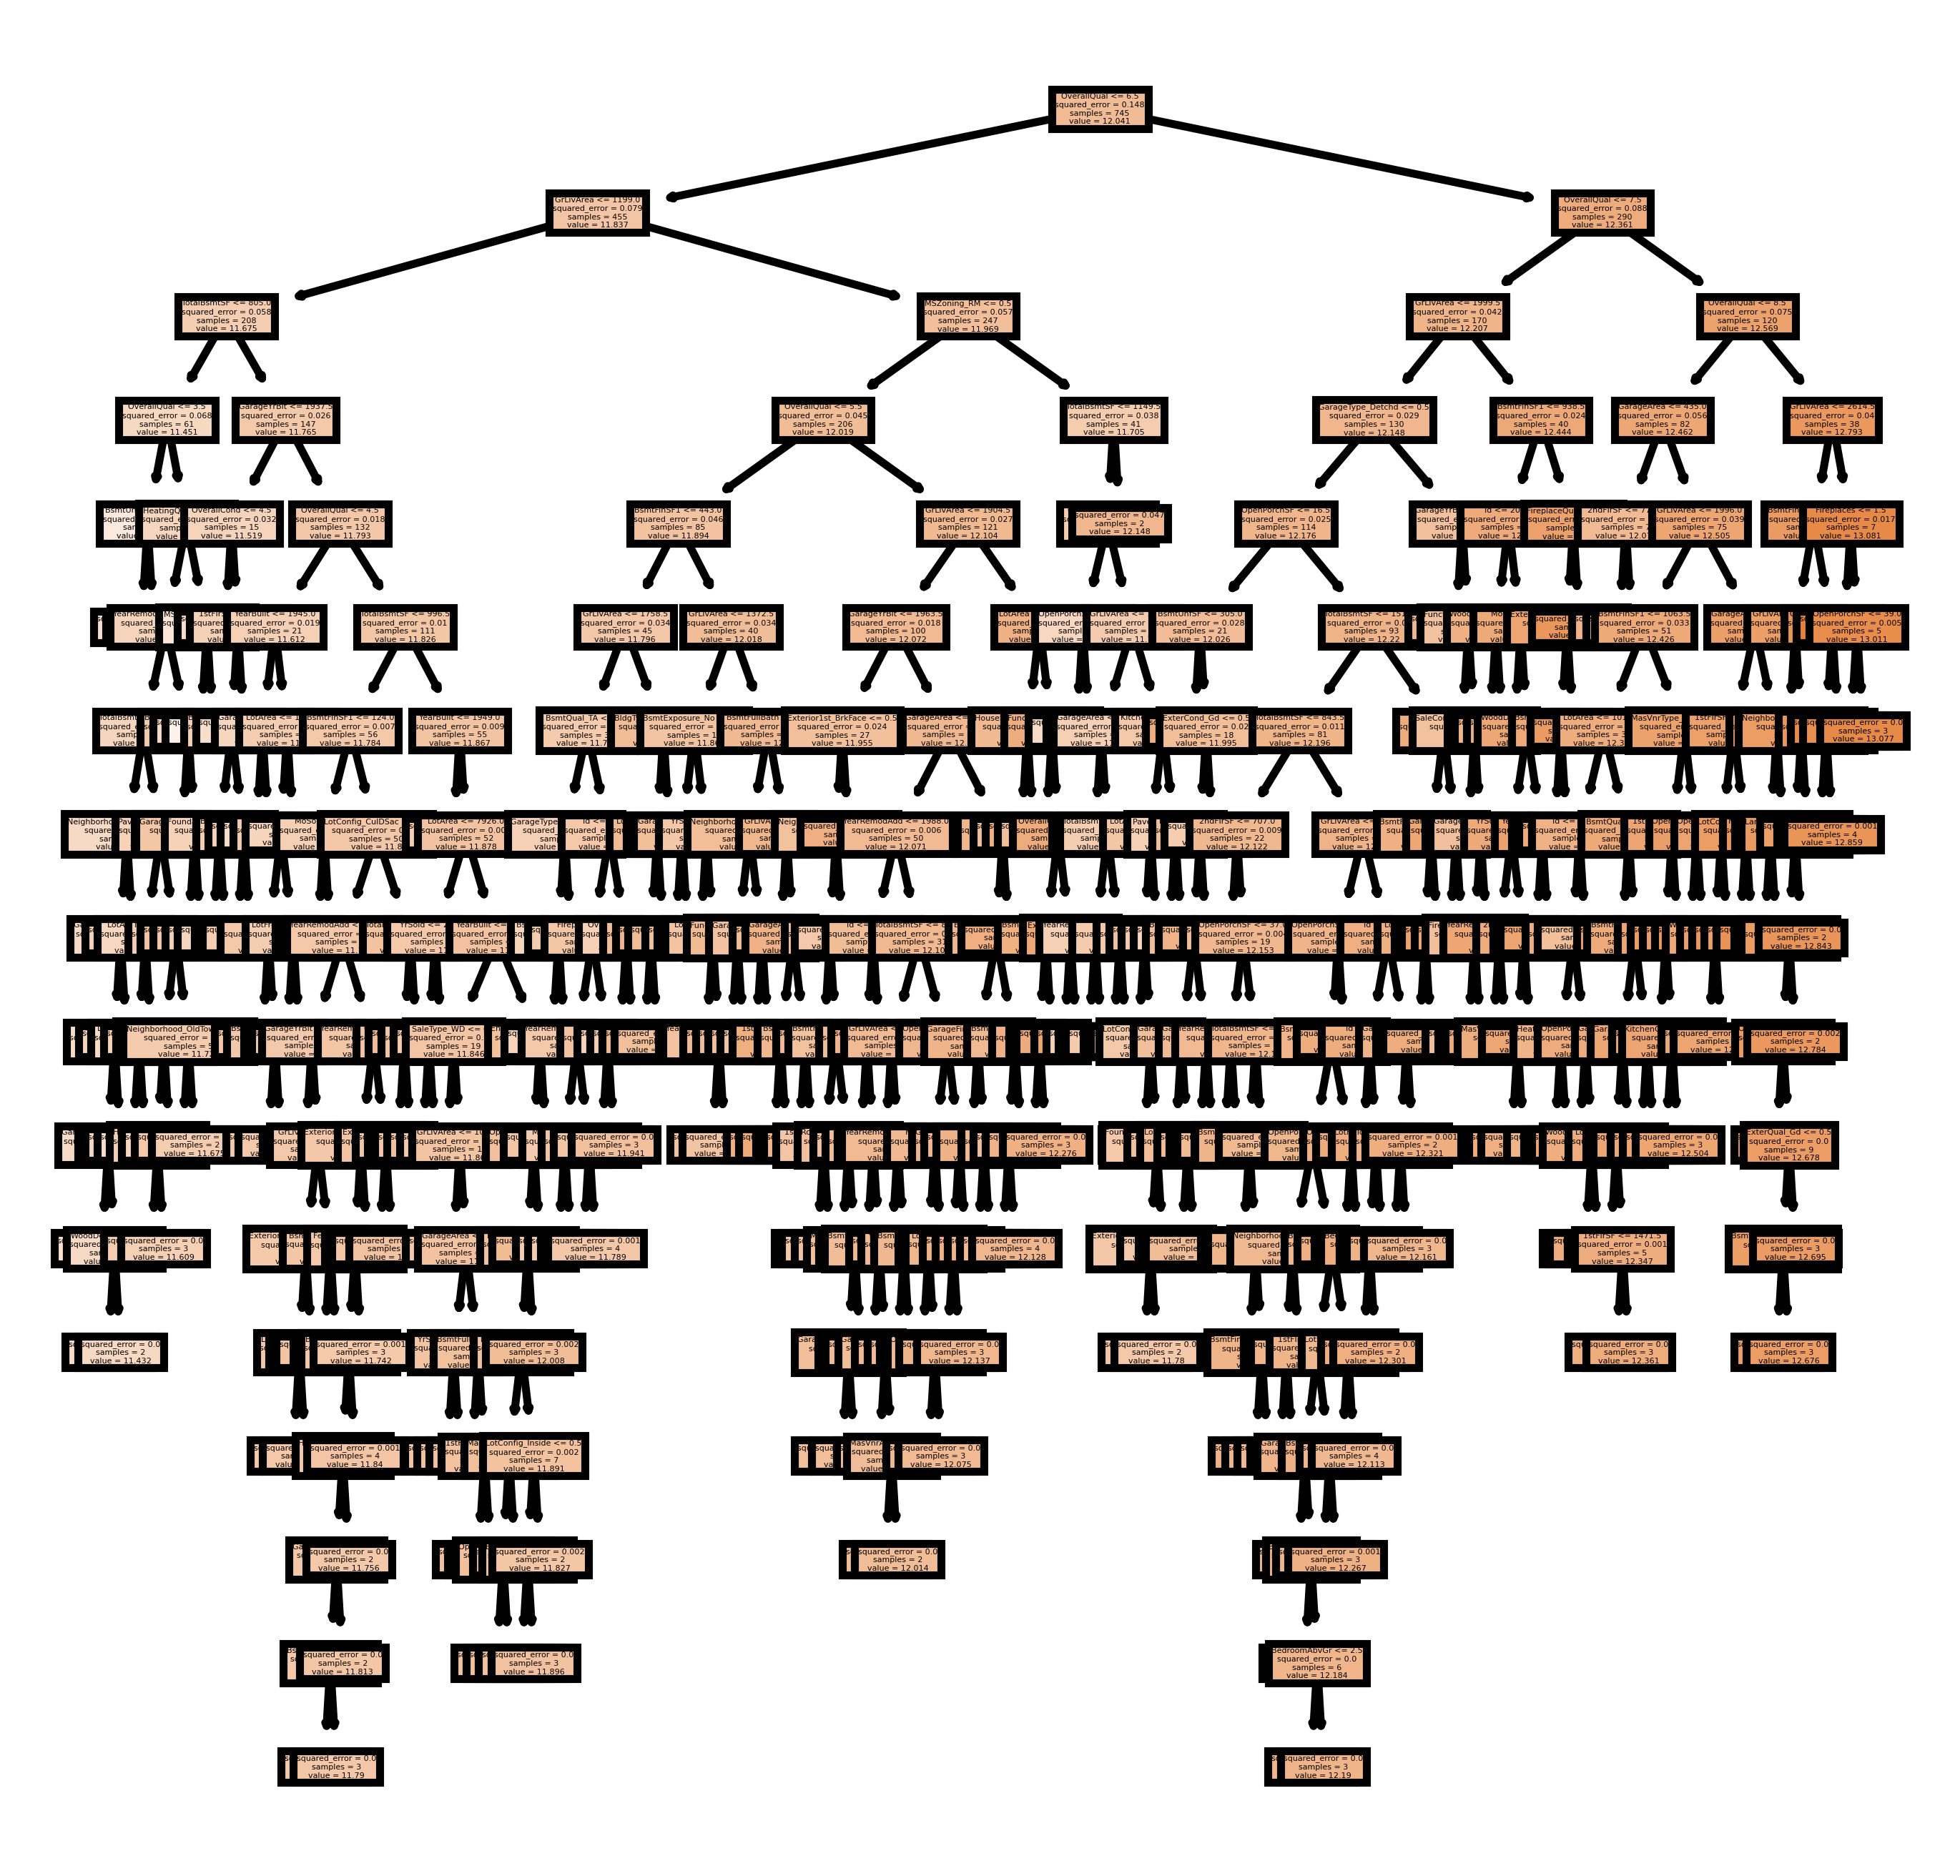

In [773]:
fn= houses_encoded_engi.columns.tolist()
cn= df['SalePrice']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model_forest_final.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

---
## Model Conclusions:

1. Overall of each model and their predictions/score/accuracy/etc.
2. Comparison of models
3. Which model is better? Is that possible to answer?
4. Be able to explain each in depth
5. Refer back to project goals of being a real estate person